In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import csv

import json
import ast
import cv2

In [2]:
dtypes = {
    'v_matrix': 'str',
    'camera_name': 'str',
    # 'object_name' : 'str',
    # 'bounds': 'str',
    # 'm_matrix': 'str'
    # define other columns as needed
}

In [3]:
ls /data/VR_NET/folders/Kawaii_Daycare/

125_2_Kawaii_Daycare/  129_2_Kawaii_Daycare/  133_2_Kawaii_Daycare/
126_2_Kawaii_Daycare/  130_2_Kawaii_Daycare/  134_2_Kawaii_Daycare/
127_2_Kawaii_Daycare/  131_2_Kawaii_Daycare/
128_2_Kawaii_Daycare/  132_2_Kawaii_Daycare/


In [4]:
path="/data/VR_NET/folders/Kawaii_Daycare/134_2_Kawaii_Daycare/data_file.csv"

In [5]:
df2=pd.read_csv(path, dtype=dtypes)

In [6]:
# df1

In [7]:
# df2['camera_name'].dropna()[0:4]

In [8]:
ls /data/VR_NET/folders/Wild_Quest/

10_1_Wild_Quest/  5_1_Wild_Quest/  7_2_Wild_Quest/  9_2_Wild_Quest/
4_2_Wild_Quest/   6_1_Wild_Quest/  8_1_Wild_Quest/


In [9]:
path="/data/VR_NET/folders/Wild_Quest/6_1_Wild_Quest/data_file.csv"

In [10]:
df4=pd.read_csv(path, dtype=dtypes)

In [11]:
ls /data/VR_NET/folders/Wake_the_Robot/

63_2_Wake_the_Robot/  67_1_Wake_the_Robot/  71_1_Wake_the_Robot/
64_2_Wake_the_Robot/  68_2_Wake_the_Robot/  72_1_Wake_the_Robot/
65_2_Wake_the_Robot/  69_1_Wake_the_Robot/
66_1_Wake_the_Robot/  70_1_Wake_the_Robot/


In [12]:
path="/data/VR_NET/folders/Wake_the_Robot/72_1_Wake_the_Robot/data_file.csv"

In [13]:
df3=pd.read_csv(path, dtype=dtypes)

In [14]:
ls /data/VR_NET/folders/Venues/

73_2_Venues/  75_2_Venues/  77_2_Venues/  79_2_Venues/  82_2_Venues/
74_2_Venues/  76_2_Venues/  78_2_Venues/  80_2_Venues/


In [15]:
path="/data/VR_NET/folders/Venues/75_2_Venues/data_file.csv"

In [16]:
df1= pd.read_csv(path, dtype=dtypes)

In [17]:
# df4

In [22]:
# print(df3.dtypes)

## Data Exploration

In [11]:
df.columns

Index(['frame', 'timestamp', 'head_dir', 'head_pos', 'head_vel', 'head_angvel',
       'left_eye_dir', 'left_eye_pos', 'left_eye_vel', 'left_eye_angvel',
       'right_eye_dir', 'right_eye_pos', 'right_eye_vel', 'right_eye_angvel',
       'left_eye', 'right_eye', 'confidence', 'is_valid',
       'ConnectedControllerTypes', 'Buttons', 'Touches', 'NearTouches',
       'IndexTrigger', 'HandTrigger', 'Thumbstick', 'object_name', 'bounds',
       'm_matrix', 'camera_name', 'p_matrix', 'v_matrix', 'video',
       'MS_rating'],
      dtype='object')

### Index trigger n Hand trigger n Thumbstick

In [10]:
df[['IndexTrigger', 'HandTrigger', 'Thumbstick']].describe()

,IndexTrigger,HandTrigger,Thumbstick
count,4295,4295,4295
unique,53,341,684
top,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0, 0.0, 0.0)"
freq,4131,3814,3603


In [16]:
df[df['IndexTrigger']!='(0.0, 0.0)'][['IndexTrigger']].describe()

,IndexTrigger
count,164
unique,52
top,"(0.0, 1.0)"
freq,107


In [15]:
df_ts1=df[df['IndexTrigger']!='(0.0, 0.0)'][['IndexTrigger']]

In [23]:
# df_ts1

In [16]:
df_ts1[567:600]['IndexTrigger'].tolist()

[]

In [15]:
df[df['HandTrigger']!='(0.0, 0.0)'][['HandTrigger']].describe()

,HandTrigger
count,481
unique,340
top,"(0.0, 1.0)"
freq,85


In [23]:
df_ts=df[df['Thumbstick']!='(0.0, 0.0, 0.0, 0.0)'][['Thumbstick']]

In [24]:
# df_ts[567:600]['Thumbstick'].tolist()

In [30]:
df_ts2=df2[df2['Thumbstick']!='(0.0, 0.0, 0.0, 0.0)'][['Thumbstick']]

In [25]:
# df_ts2[567:600]['Thumbstick'].tolist()

### Buttons

In [6]:
df[1442:1445]["Buttons"]

1442    0.0
1443    0.0
1444    0.0
Name: Buttons, dtype: float64

In [26]:
# df[df["Buttons"]>0]["Buttons"]

### Gaze

### Left eye n right eye

### Pose: head

In [9]:
df_head=df[['head_dir', 'head_pos', 'head_vel', 'head_angvel']]

In [11]:
df_head.describe()

,head_dir,head_pos,head_vel,head_angvel
count,4306,4306,4306,4306
unique,4306,4306,4306,4306
top,"(0.018842056393623352, -0.0985942929983139, 0....","(0.12967653572559357, 0.02929370477795601, 0.3...","(-0.0005711866542696953, -0.03893550485372543,...","(-0.3490055799484253, -0.17483003437519073, 0...."
freq,1,1,1,1


In [19]:
cp -r /data/VR_NET/folders/Wild_Quest/9_2_Wild_Quest/video .

In [20]:
archive=shutil.make_archive("data", 'zip', "video")

In [6]:
pwd

'/home/dinithi/vr-motion-sickness-modelling/Data_Pre_Processing'

In [8]:
df[588:600]['head_dir'].tolist()

['(-0.32917898893356323, -0.23989273607730865, -0.05710708349943161, 0.911499559879303)',
 '(-0.32402321696281433, -0.2319263219833374, -0.05315835028886795, 0.9156382083892822)',
 '(-0.2398751825094223, -0.18286782503128052, -0.02389553189277649, 0.953125536441803)',
 '(-0.1981803923845291, -0.1527901440858841, -0.02182595804333687, 0.967937707901001)',
 '(-0.1861388236284256, -0.15382684767246246, -0.013929013162851334, 0.9703070521354675)',
 '(-0.17284373939037323, -0.15384063124656677, -0.00713177677243948, 0.9728346467018127)',
 '(-0.16193479299545288, -0.1357419192790985, -0.006586863659322262, 0.9773985147476196)',
 '(-0.16043472290039062, -0.15376920998096466, -0.005818067118525505, 0.9749779105186462)',
 '(-0.1530919075012207, -0.1726813018321991, -0.002274793805554509, 0.9730051755905151)',
 '(-0.14936932921409607, -0.17724214494228363, -0.0009636040776968002, 0.9727656841278076)',
 '(-0.15108734369277954, -0.1766817271709442, -0.001517314463853836, 0.9726016521453857)',
 '(-

### Scene

In [8]:
li1=df[3588:3589]['object_name'].tolist()

In [9]:
len(li1[0][1:-1].split("'"))

203

In [13]:
li2=df2[3588:3589]['object_name'].tolist()

In [14]:
len(li2[0][1:-1].split("'"))

8075

In [16]:
# li2

In [24]:
from PIL import Image
import os

def display_images(image_paths):
    for image_path in image_paths:
        try:
            img = Image.open(image_path)
            img.show()
        except Exception as e:
            print(f"Error displaying {image_path}: {e}")

In [25]:
images=df["video"].dropna().to_list()

In [26]:
cd /data/VR_NET/folders/3D_Play_House/83_1_3D_Play_House

/data/VR_NET/folders/3D_Play_House/83_1_3D_Play_House


In [28]:
image_paths = [x+".jpg" for x in images]
# display_images(image_paths)

In [30]:
# image_paths

In [27]:
# change=[]
# # Function to calculate change in direction and record occurrences
# def calculate_direction_change_and_record(prev_pos, curr_pos, increasing_list, decreasing_list):
#     prev_x, prev_y, prev_z = prev_pos
#     curr_x, curr_y, curr_z = curr_pos
#     if curr_x > prev_x and curr_y > prev_y and curr_z > prev_z:
#         change.append(curr_pos)
#         # return 'Increasing'
#     elif curr_x < prev_x and curr_y < prev_y and curr_z < prev_z:
#         change.append(curr_pos)
#         # return 'Decreasing'
#     else:
#         change.append()
#         # return 'No Change'

# # Initialize lists to record increasing and decreasing instances
# increasing_instances = []
# decreasing_instances = []

# # Apply the function to create a new column and record occurrences
# df['direction_change'] = df.apply(lambda row: calculate_direction_change_and_record(df['positions'].iloc[row.name - 1], row['positions'], increasing_instances, decreasing_instances), axis=1)

# print("Increasing instances:", increasing_instances)
# print("Decreasing instances:", decreasing_instances)
# print(df)


In [48]:
len(head_pos)

5015

In [72]:
#head position change vs ms_rating
import ast

x_change=[0]
y_change=[0]
z_change=[0]

def pos_change(prev_pos,curr_pos,x_change,y_change,z_change):
    # print(prev_pos[0])
    prev_x, prev_y, prev_z = prev_pos[0], prev_pos[1], prev_pos[2]
    (curr_x, curr_y, curr_z) = curr_pos[0], curr_pos[1], curr_pos[2],
    x_change.append(curr_x-prev_x)
    y_change.append(curr_y-prev_y)
    z_change.append(curr_z-prev_z)
    return x_change, y_change, z_change

head_pos=df["head_pos"].to_list()

for i in range(len(head_pos)-1):
    # print(head_pos[i])
    x_change, y_change, z_change=pos_change(ast.literal_eval(head_pos[i]),ast.literal_eval(head_pos[i+1]),x_change,y_change,z_change)


Head Position


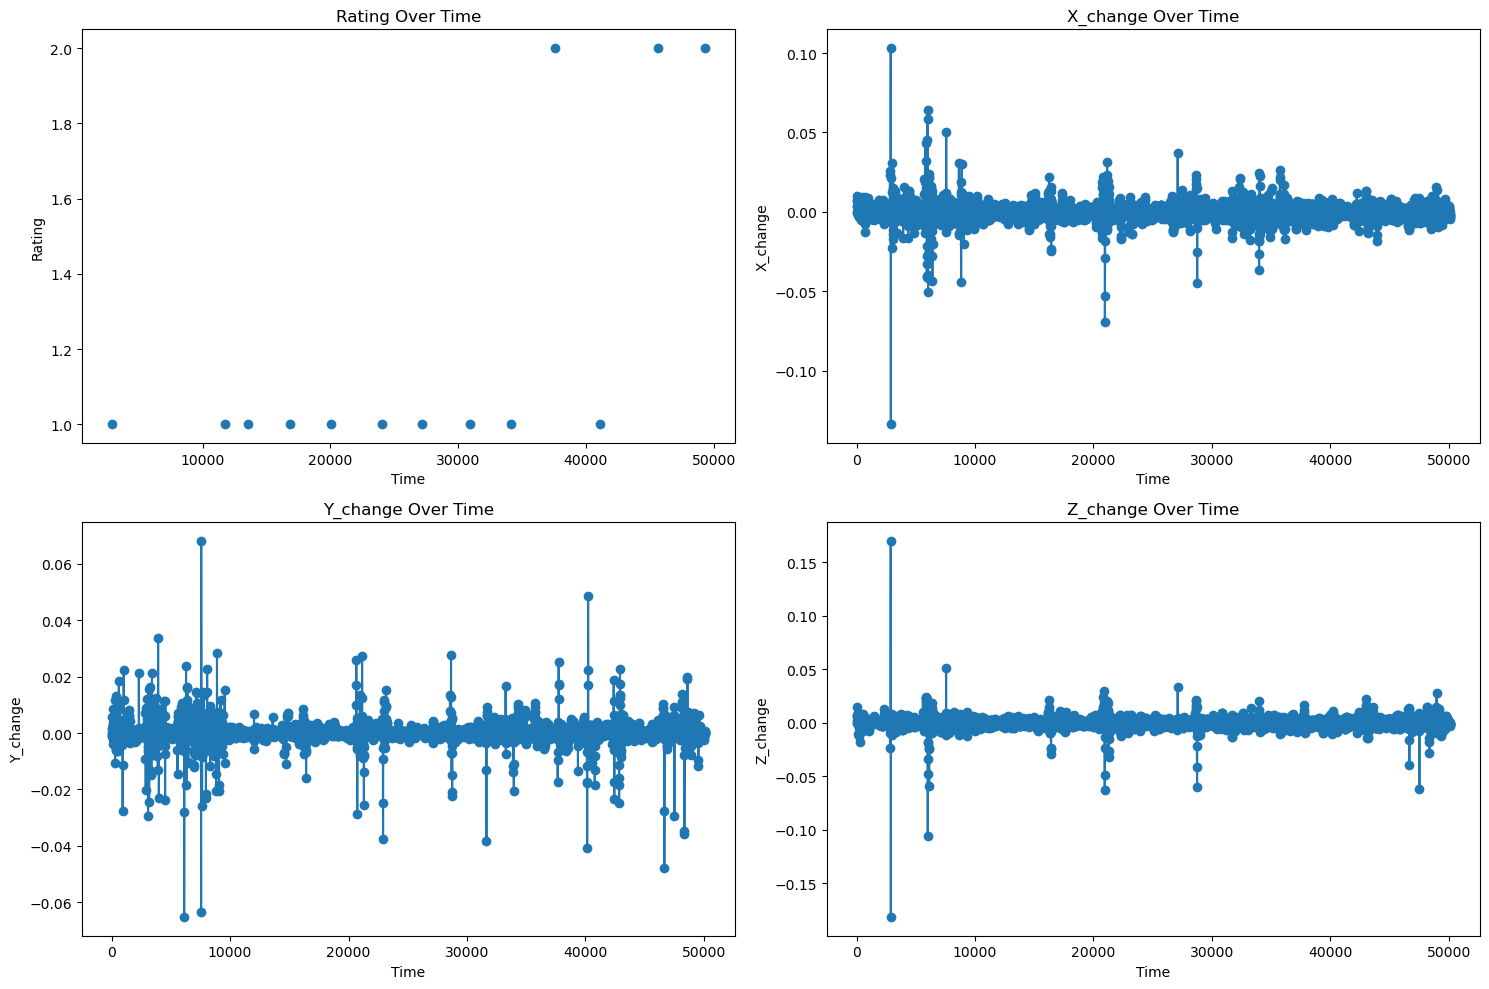

In [73]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

print("Head Position")

# Plot Rating Over Time
axs[0, 0].plot(df['frame'], df['MS_rating'], marker='o')
axs[0, 0].set_title('Rating Over Time')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Rating')

# Plot X_change Over Time
axs[0, 1].plot(df['frame'], x_change, marker='o')
axs[0, 1].set_title('X_change Over Time')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('X_change')

# Plot Y_change Over Time
axs[1, 0].plot(df['frame'], y_change, marker='o')
axs[1, 0].set_title('Y_change Over Time')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Y_change')

# Plot Z_change Over Time
axs[1, 1].plot(df['frame'], z_change, marker='o')
axs[1, 1].set_title('Z_change Over Time')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Z_change')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Head Velocity


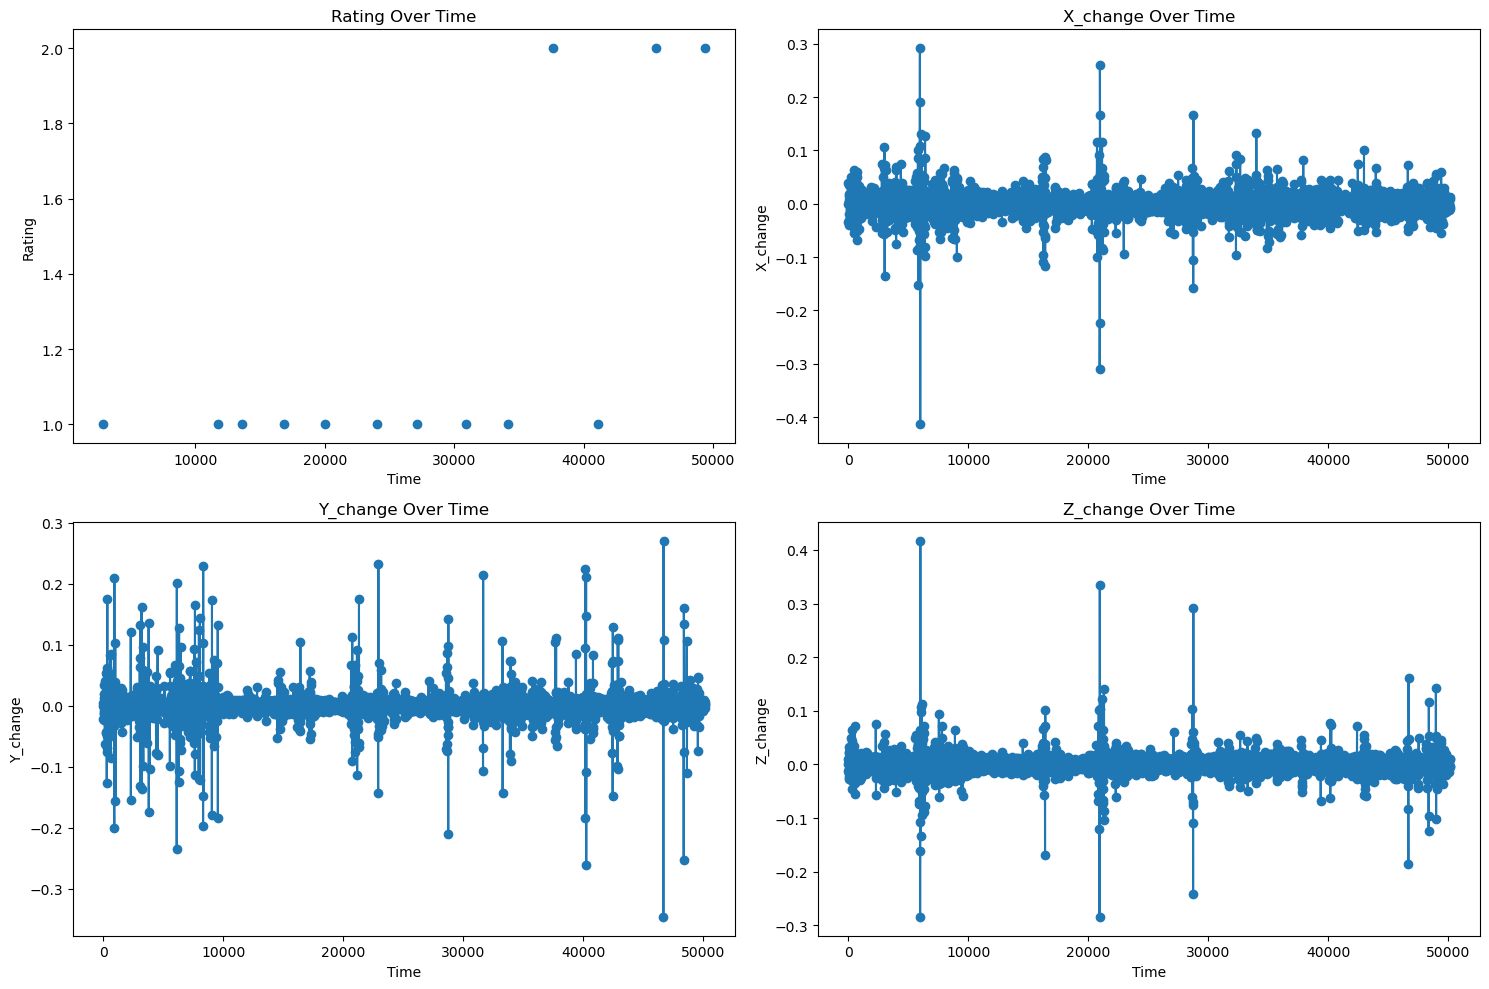

In [65]:
#head position change vs ms_rating
import ast

x_change=[0]
y_change=[0]
z_change=[0]

def pos_change(prev_pos,curr_pos,x_change,y_change,z_change):
    # print(prev_pos[0])
    prev_x, prev_y, prev_z = prev_pos[0], prev_pos[1], prev_pos[2]
    (curr_x, curr_y, curr_z) = curr_pos[0], curr_pos[1], curr_pos[2],
    x_change.append(curr_x-prev_x)
    y_change.append(curr_y-prev_y)
    z_change.append(curr_z-prev_z)
    return x_change, y_change, z_change

head_pos=df["head_vel"].to_list()

for i in range(len(head_pos)-1):
    # print(head_pos[i])
    x_change, y_change, z_change=pos_change(ast.literal_eval(head_pos[i]),ast.literal_eval(head_pos[i+1]),x_change,y_change,z_change)
    
# Create a figure and subplots with a 2x2 grid layout
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

print("Head Velocity")

# Plot Rating Over Time
axs[0, 0].plot(df['frame'], df['MS_rating'], marker='o')
axs[0, 0].set_title('Rating Over Time')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Rating')

# Plot X_change Over Time
axs[0, 1].plot(df['frame'], x_change, marker='o')
axs[0, 1].set_title('X_change Over Time')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('X_change')

# Plot Y_change Over Time
axs[1, 0].plot(df['frame'], y_change, marker='o')
axs[1, 0].set_title('Y_change Over Time')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Y_change')

# Plot Z_change Over Time
axs[1, 1].plot(df['frame'], z_change, marker='o')
axs[1, 1].set_title('Z_change Over Time')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Z_change')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Head Angular Velocity


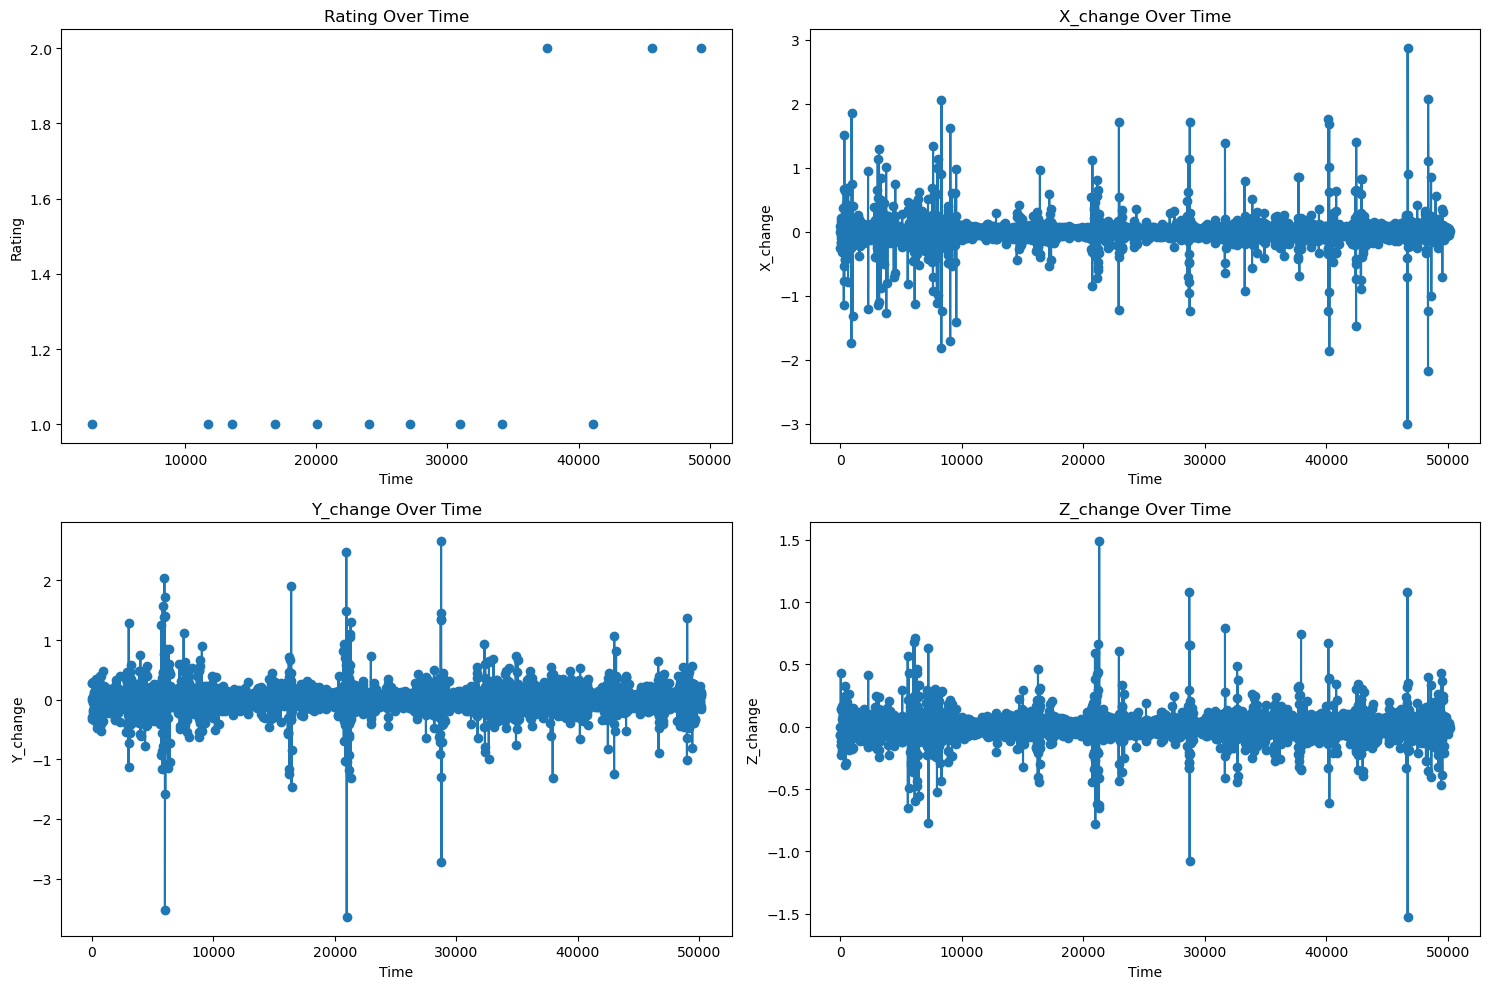

In [70]:
#head position change vs ms_rating
import ast

x_change=[0]
y_change=[0]
z_change=[0]

def pos_change(prev_pos,curr_pos,x_change,y_change,z_change):
    # print(prev_pos[0])
    prev_x, prev_y, prev_z = prev_pos[0], prev_pos[1], prev_pos[2]
    (curr_x, curr_y, curr_z) = curr_pos[0], curr_pos[1], curr_pos[2],
    x_change.append(curr_x-prev_x)
    y_change.append(curr_y-prev_y)
    z_change.append(curr_z-prev_z)
    return x_change, y_change, z_change

head_pos=df["head_angvel"].to_list()

for i in range(len(head_pos)-1):
    # print(head_pos[i])
    x_change, y_change, z_change=pos_change(ast.literal_eval(head_pos[i]),ast.literal_eval(head_pos[i+1]),x_change,y_change,z_change)
    
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

print("Head Angular Velocity")

# Plot Rating Over Time
axs[0, 0].plot(df['frame'], df['MS_rating'], marker='o')
axs[0, 0].set_title('Rating Over Time')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Rating')

# Plot X_change Over Time
axs[0, 1].plot(df['frame'], x_change, marker='o')
axs[0, 1].set_title('X_change Over Time')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('X_change')

# Plot Y_change Over Time
axs[1, 0].plot(df['frame'], y_change, marker='o')
axs[1, 0].set_title('Y_change Over Time')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Y_change')

# Plot Z_change Over Time
axs[1, 1].plot(df['frame'], z_change, marker='o')
axs[1, 1].set_title('Z_change Over Time')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Z_change')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Left Eye Position


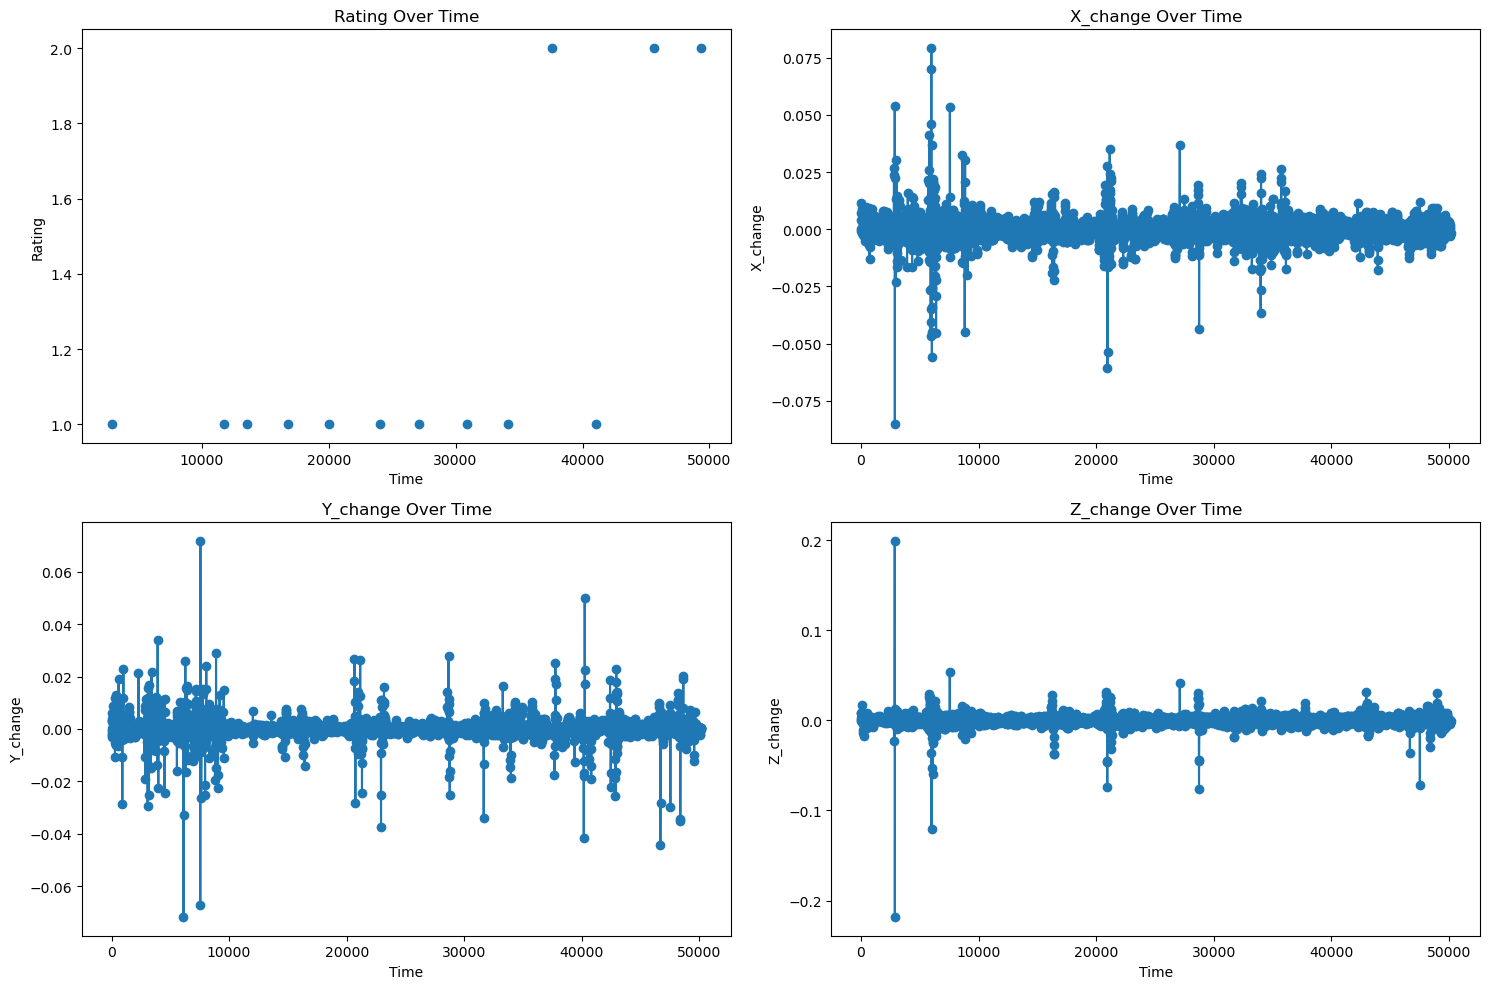

In [71]:
#head position change vs ms_rating
import ast

x_change=[0]
y_change=[0]
z_change=[0]

def pos_change(prev_pos,curr_pos,x_change,y_change,z_change):
    # print(prev_pos[0])
    prev_x, prev_y, prev_z = prev_pos[0], prev_pos[1], prev_pos[2]
    (curr_x, curr_y, curr_z) = curr_pos[0], curr_pos[1], curr_pos[2],
    x_change.append(curr_x-prev_x)
    y_change.append(curr_y-prev_y)
    z_change.append(curr_z-prev_z)
    return x_change, y_change, z_change

head_pos=df["left_eye_pos"].to_list()

for i in range(len(head_pos)-1):
    # print(head_pos[i])
    x_change, y_change, z_change=pos_change(ast.literal_eval(head_pos[i]),ast.literal_eval(head_pos[i+1]),x_change,y_change,z_change)
    
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

print("Left Eye Position")

# Plot Rating Over Time
axs[0, 0].plot(df['frame'], df['MS_rating'], marker='o')
axs[0, 0].set_title('Rating Over Time')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Rating')

# Plot X_change Over Time
axs[0, 1].plot(df['frame'], x_change, marker='o')
axs[0, 1].set_title('X_change Over Time')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('X_change')

# Plot Y_change Over Time
axs[1, 0].plot(df['frame'], y_change, marker='o')
axs[1, 0].set_title('Y_change Over Time')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Y_change')

# Plot Z_change Over Time
axs[1, 1].plot(df['frame'], z_change, marker='o')
axs[1, 1].set_title('Z_change Over Time')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Z_change')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Right Eye Position


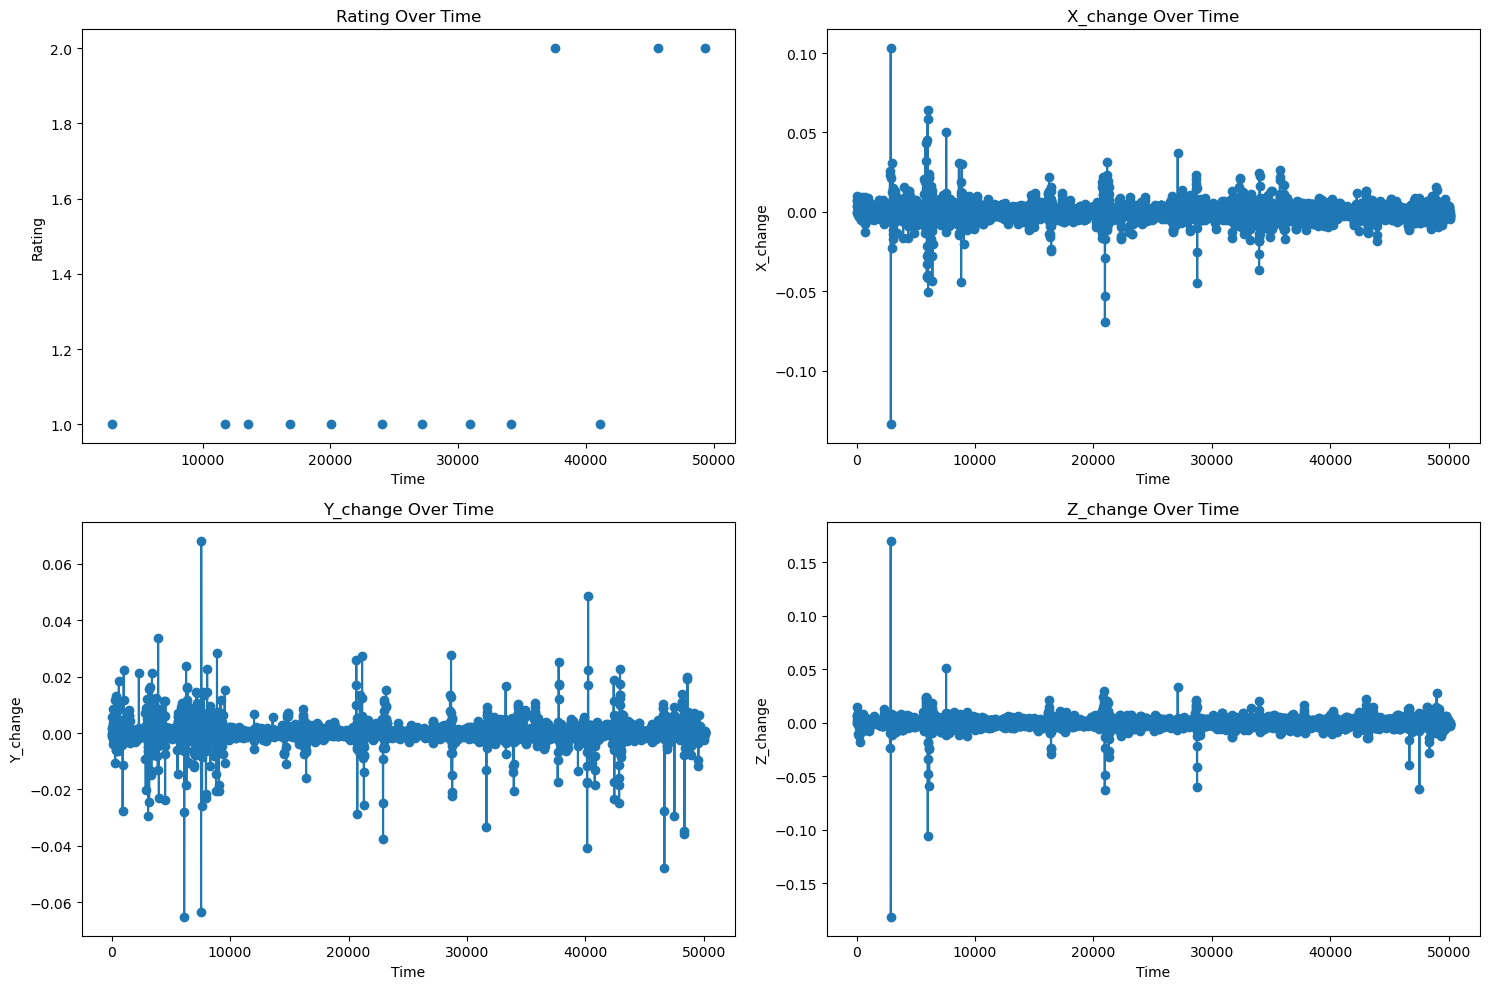

In [74]:
#head position change vs ms_rating
import ast

x_change=[0]
y_change=[0]
z_change=[0]

def pos_change(prev_pos,curr_pos,x_change,y_change,z_change):
    # print(prev_pos[0])
    prev_x, prev_y, prev_z = prev_pos[0], prev_pos[1], prev_pos[2]
    (curr_x, curr_y, curr_z) = curr_pos[0], curr_pos[1], curr_pos[2],
    x_change.append(curr_x-prev_x)
    y_change.append(curr_y-prev_y)
    z_change.append(curr_z-prev_z)
    return x_change, y_change, z_change

head_pos=df["right_eye_pos"].to_list()

for i in range(len(head_pos)-1):
    # print(head_pos[i])
    x_change, y_change, z_change=pos_change(ast.literal_eval(head_pos[i]),ast.literal_eval(head_pos[i+1]),x_change,y_change,z_change)
    
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

print("Right Eye Position")

# Plot Rating Over Time
axs[0, 0].plot(df['frame'], df['MS_rating'], marker='o')
axs[0, 0].set_title('Rating Over Time')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Rating')

# Plot X_change Over Time
axs[0, 1].plot(df['frame'], x_change, marker='o')
axs[0, 1].set_title('X_change Over Time')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('X_change')

# Plot Y_change Over Time
axs[1, 0].plot(df['frame'], y_change, marker='o')
axs[1, 0].set_title('Y_change Over Time')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Y_change')

# Plot Z_change Over Time
axs[1, 1].plot(df['frame'], z_change, marker='o')
axs[1, 1].set_title('Z_change Over Time')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Z_change')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Touches


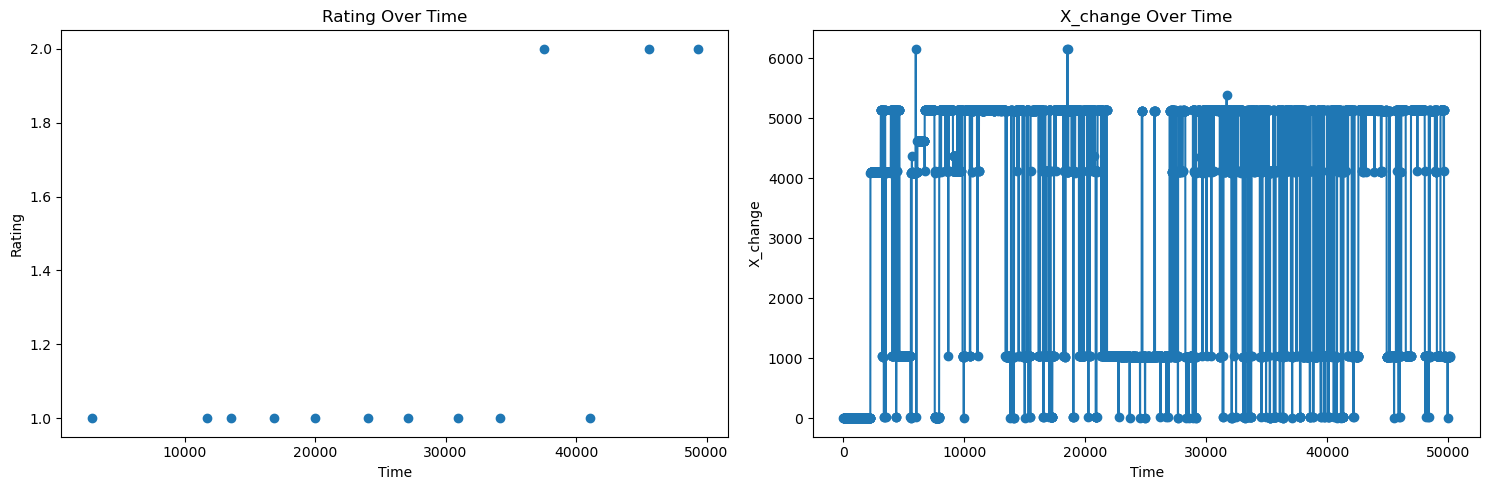

In [80]:
#head position change vs ms_rating
import ast

x_change=[0]
y_change=[0]
z_change=[0]

def pos_change(prev_pos,curr_pos,x_change,y_change,z_change):
    # print(prev_pos[0])
    prev_x, prev_y, prev_z = prev_pos[0], prev_pos[1], prev_pos[2]
    (curr_x, curr_y, curr_z) = curr_pos[0], curr_pos[1], curr_pos[2],
    x_change.append(curr_x-prev_x)
    y_change.append(curr_y-prev_y)
    z_change.append(curr_z-prev_z)
    return x_change, y_change, z_change

head_pos=df["left_eye_pos"].to_list()

for i in range(len(head_pos)-1):
    # print(head_pos[i])
    x_change, y_change, z_change=pos_change(ast.literal_eval(head_pos[i]),ast.literal_eval(head_pos[i+1]),x_change,y_change,z_change)
    
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

print("Touches")

# Plot Rating Over Time
axs[0].plot(df['frame'], df['MS_rating'], marker='o')
axs[0].set_title('Rating Over Time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Rating')

# Plot X_change Over Time
axs[1].plot(df['frame'], df["Touches"], marker='o')
axs[1].set_title('X_change Over Time')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('X_change')

# # Plot Y_change Over Time
# axs[1, 0].plot(df['frame'], y_change, marker='o')
# axs[1, 0].set_title('Y_change Over Time')
# axs[1, 0].set_xlabel('Time')
# axs[1, 0].set_ylabel('Y_change')

# # Plot Z_change Over Time
# axs[1, 1].plot(df['frame'], z_change, marker='o')
# axs[1, 1].set_title('Z_change Over Time')
# axs[1, 1].set_xlabel('Time')
# axs[1, 1].set_ylabel('Z_change')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Buttons


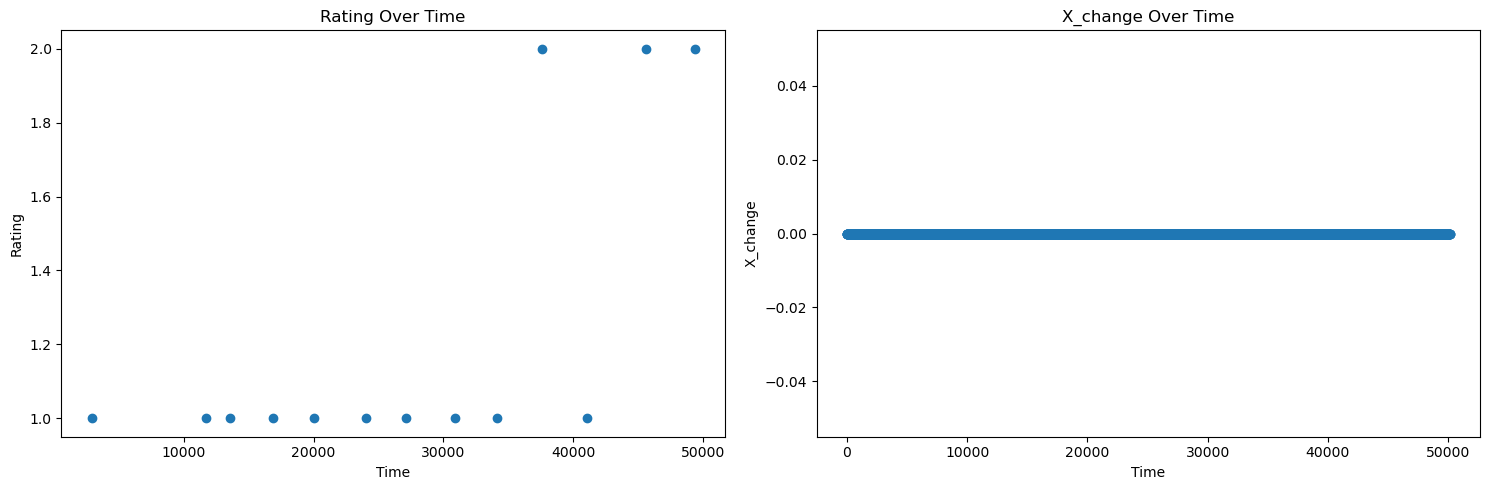

In [81]:
#head position change vs ms_rating
import ast

x_change=[0]
y_change=[0]
z_change=[0]

def pos_change(prev_pos,curr_pos,x_change,y_change,z_change):
    # print(prev_pos[0])
    prev_x, prev_y, prev_z = prev_pos[0], prev_pos[1], prev_pos[2]
    (curr_x, curr_y, curr_z) = curr_pos[0], curr_pos[1], curr_pos[2],
    x_change.append(curr_x-prev_x)
    y_change.append(curr_y-prev_y)
    z_change.append(curr_z-prev_z)
    return x_change, y_change, z_change

head_pos=df["left_eye_pos"].to_list()

for i in range(len(head_pos)-1):
    # print(head_pos[i])
    x_change, y_change, z_change=pos_change(ast.literal_eval(head_pos[i]),ast.literal_eval(head_pos[i+1]),x_change,y_change,z_change)
    
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

print("Buttons")

# Plot Rating Over Time
axs[0].plot(df['frame'], df['MS_rating'], marker='o')
axs[0].set_title('Rating Over Time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Rating')

# Plot X_change Over Time
axs[1].plot(df['frame'], df["Buttons"], marker='o')
axs[1].set_title('X_change Over Time')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('X_change')

# # Plot Y_change Over Time
# axs[1, 0].plot(df['frame'], y_change, marker='o')
# axs[1, 0].set_title('Y_change Over Time')
# axs[1, 0].set_xlabel('Time')
# axs[1, 0].set_ylabel('Y_change')

# # Plot Z_change Over Time
# axs[1, 1].plot(df['frame'], z_change, marker='o')
# axs[1, 1].set_title('Z_change Over Time')
# axs[1, 1].set_xlabel('Time')
# axs[1, 1].set_ylabel('Z_change')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [83]:
df.columns

Index(['frame', 'timestamp', 'head_dir', 'head_pos', 'head_vel', 'head_angvel',
       'left_eye_dir', 'left_eye_pos', 'left_eye_vel', 'left_eye_angvel',
       'right_eye_dir', 'right_eye_pos', 'right_eye_vel', 'right_eye_angvel',
       'left_eye', 'right_eye', 'confidence', 'is_valid',
       'ConnectedControllerTypes', 'Buttons', 'Touches', 'NearTouches',
       'IndexTrigger', 'HandTrigger', 'Thumbstick', 'video', 'MS_rating'],
      dtype='object')

### Get what games I miss if I use only the games with scene data

In [20]:
logfile= pd.read_csv("/home/dinithi/vr-motion-sickness-modelling/DataExtractionScripts/log_csvs/main_log.csv")

In [21]:
logfile

,name,pose,gaze,control,scene_obj,scene_cam,video,MS_rating,face
0,5_2_Earth_Gym,1,1,1,1,1,1,1,0
1,6_1_Wild_Quest,1,1,1,1,1,1,1,0
2,5_1_Wild_Quest,1,1,1,1,1,1,1,0
3,8_1_Wild_Quest,1,1,1,1,1,1,1,0
4,145_1_Roommate,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...
793,161_1_Barnyard,1,1,1,1,1,1,1,0
794,156_1_Barnyard,1,1,1,1,1,1,1,0
795,152_2_City_Parkour,1,1,1,1,1,1,1,0
796,147_1_Creature_Feature,1,1,1,1,1,1,1,0


In [22]:
game_sessions_with_scene=logfile[logfile["scene_obj"]==1]

In [11]:
# game_sessions_with_scene

In [23]:
games={}

names=game_sessions_with_scene["name"].to_list()

for i in names:
    gamename="_".join(i.split("_")[2:])
    if gamename not in games.keys():
        games[gamename]=[]
    games[gamename].append(i)

In [13]:
"_".join("4_5_6_7_*".split("_")[2:])

'6_7_*'

In [25]:
# games

In [26]:
with open("games_used", "w") as json_file:
    json.dump(games, json_file)

### Scene

#### check whether it records the absolute value

In [154]:
dfg=df2

In [155]:
dfg[1889:1891][["object_name","bounds","m_matrix"]]

,object_name,bounds,m_matrix
1889,"['MeshCluster_219', 'MeshCluster_218', 'MeshCl...","[(-13.755597114562988, 7.236511707305908, 24.9...","[(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
1890,"['MeshCluster_219', 'MeshCluster_218', 'MeshCl...","[(-13.755597114562988, 7.236511707305908, 24.9...","[(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."


In [192]:
scene1=dfg[999:1000]["object_name"].tolist()

In [193]:
scene2=dfg[1907:1908]["object_name"].tolist()

In [194]:
scene1b=dfg[999:1000]["bounds"].tolist()
scene2b=dfg[1907:1908]["bounds"].tolist()

In [195]:
scene1m=dfg[999:1000]["m_matrix"].tolist()
scene2m=dfg[1907:1908]["m_matrix"].tolist()

In [196]:
len(scene1)

1

In [197]:
# scene1[0][1:-1].split(",")
# result_list = ast.literal_eval(scene1)
# ast.literal_eval(result_list[0])

In [198]:
# scene
"1234 ".strip()

'1234'

In [199]:
scene=scene1[0][1:-1].split(",")
scene1=[]
for i in scene: 
    scene1.append(i.strip()[1:-1])

scene=scene2[0][1:-1].split(",")
scene2=[]
for i in scene: 
    scene2.append(i.strip()[1:-1])

In [200]:
scene1b=ast.literal_eval(scene1b[0][1:-1])
scene2b=ast.literal_eval(scene2b[0][1:-1])

scene1m=ast.literal_eval(scene1m[0][1:-1])
scene2m=ast.literal_eval(scene2m[0][1:-1])

In [201]:
print(len(scene1),len(scene1b),len(scene1m))

4018 4016 4016


In [21]:
# # scene2
# def calculate_bounding_box_area(bounding_boxes):
#     total_area = []

#     for box in bounding_boxes:
#         # Extracting min and max coordinates
#         minX, minY, minZ, maxX, maxY, maxZ = box

#         # Calculate dimensions of the bounding box
#         width = abs(maxX - minX)
#         height = abs(maxY - minY)
#         depth = abs(maxZ - minZ)

#         # Calculate the area of the bounding box
#         area = 2 * (width * height + width * depth + height * depth)

#         # Add the area of this bounding box to the total area
#         total_area.append(area)

#     return total_area

# def count_values_greater_than_100(arr):
#     count = sum(1 for value in arr if int(value) > 1)
#     return count
# # Example usage:
# bounding_boxes = scene1b



# total_area = calculate_bounding_box_area(bounding_boxes)
# print(count_values_greater_than_100(total_area))
# print("Total area of all bounding boxes:", total_area)


In [203]:
# scene2


In [148]:
# scene2

In [27]:
# scene1b

In [28]:
# scene2b

In [144]:
len(scene2)

53

In [145]:
count=0
for i in scene1:
    if i in scene2:
        ind1=scene1.index(i)
        ind2=scene2.index(i)
        if scene1b[ind1]!=scene2b[ind2]:
            # print(ind2)
            print(i, end=",")
        # print(i)

VerticalLines_Fx(Clone),VerticalLines_Fx(Clone),TrailTapered_Fx(Clone),ComfortAid_SphereCutOff,MeshCluster_117,MeshCluster_106,MeshCluster_86,MeshCluster_81,MeshCluster_78,MeshCluster_74,MeshCluster_41,MeshCluster_38,MeshCluster_32,MeshCluster_30,MeshCluster_6,

#### Camera

In [36]:
scene1=df2[1906:1907]["camera_name"].tolist()
scene2=df2[1907:1908]["camera_name"].tolist()

scene1p=df2[1906:1907]["p_matrix"].tolist()
scene2p=df2[1907:1908]["p_matrix"].tolist()

scene1v=df2[1906:1907]["v_matrix"].tolist()
scene2v=df2[1907:1908]["v_matrix"].tolist()

In [ ]:
scene1v==scene2v

In [34]:
scene1=df2[1906:1907]["p_matrix"].tolist()

### video script

In [13]:
paths=df2["video"].dropna().to_list()

In [14]:
# paths

In [20]:
root="/data/VR_NET/folders/Wild_Quest/6_1_Wild_Quest/"
vpaths=[]
for i in paths:
    # print(i)
    vpaths.append(os.path.join(root,i+'.jpg'))

In [26]:
# brightness changing script

In [31]:
import cv2
import numpy as np

def calculate_brightness(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calculate average pixel intensity
    avg_intensity = np.mean(gray_image)
    return avg_intensity

def detect_lighting_changes(images):
    # Calculate average pixel intensity for each image
    # image = image.astype('uint8')
    brightness_values = [calculate_brightness(image.astype('uint8')) for image in images]
    # Calculate differences in brightness between consecutive images
    brightness_changes = [abs(brightness_values[i] - brightness_values[i+1]) for i in range(len(brightness_values)-1)]
    print(np.argmax(brightness_changes))
    # Define threshold for detecting major changes
    threshold = 20  # You may need to adjust this threshold based on your images
    # Check for major changes in brightness
    major_changes = any(change > threshold for change in brightness_changes)
    return major_changes

# Example usage
image_paths = vpaths # Paths to your image files
# print(image_paths)
images = [cv2.imread(image_path) for image_path in image_paths]
# print(images)

if detect_lighting_changes(images):
    print("Major changes in lighting intensity detected.")
else:
    print("No major changes in lighting intensity detected.")


1211
Major changes in lighting intensity detected.


In [48]:
# import cv2

# def detect_luminous_objects(image_path, threshold=200):
#     # Load the image
#     image = cv2.imread(image_path)
#     if image is None:
#         print("Error: Failed to load image from", image_path)
#         return False
    
#     # Convert the image to grayscale
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#     # Threshold the grayscale image to detect bright areas
#     _, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    
#     # Find contours of bright areas
#     contours, _= cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     print(contours)
    
#     # Check if there are any contours (luminous objects) detected
#     if len(contours) > 0:
#         return True
#     else:
#         return False

# # List of image paths
# image_paths = vpaths # Replace with your list of image paths

# # Iterate over each image and detect luminous objects
# for image_path in image_paths:
#     print(image_path)
#     if detect_luminous_objects(image_path):
#         print("Luminous objects detected in", image_path)
#     else:
#         print("No luminous objects detected in", image_path)


In [ ]:
def calculate_bounding_box_area(bounding_boxes):
    total_area = 0

    for box in bounding_boxes:
        # Extracting min and max coordinates
        minX, minY, minZ, maxX, maxY, maxZ = box

        # Calculate dimensions of the bounding box
        width = maxX - minX
        height = maxY - minY
        depth = maxZ - minZ

        # Calculate the area of the bounding box
        area = 2 * (width * height + width * depth + height * depth)

        # Add the area of this bounding box to the total area
        total_area += area

    return total_area

# Example usage:
bounding_boxes = [
    [0, 0, 0, 1, 1, 1],  # Example bounding box 1
    [-1, -1, -1, 2, 2, 2],  # Example bounding box 2
    # Add more bounding boxes here if needed
]

total_area = calculate_bounding_box_area(bounding_boxes)
print("Total area of all bounding boxes:", total_area)


#### gaze

In [26]:
df[500:503]["left_eye"].to_list()

['(-0.12746581435203552, -0.10515227913856506, -0.02778211049735546, 0.9858618974685669, -0.07672271132469177, 0.012633737176656723, -0.18248358368873596)',
 '(-0.1365964114665985, -0.09974820166826248, -0.032138507813215256, 0.9850679039955139, -0.07690511643886566, 0.013134264387190342, -0.18070870637893677)',
 '(-0.13810352981090546, -0.1126924455165863, -0.029420044273138046, 0.9835457801818848, -0.07770887762308121, 0.013595146127045155, -0.17927542328834534)']

In [23]:
df[500:503]["left_eye_pos"]

500    (-0.014748957008123398, 0.015681836754083633, ...
501    (-0.015895862132310867, 0.014796027913689613, ...
502    (-0.016077188774943352, 0.015130870044231415, ...
Name: left_eye_pos, dtype: object

In [25]:

from scipy.spatial.transform import Rotation
import numpy as np

def quaternion_to_euler(quaternion):
    # Create a Rotation object from the quaternion
    r = Rotation.from_quat(quaternion)
    
    # Convert the Rotation object to Euler angles
    euler_angles = r.as_euler('xyz', degrees=True)  # Order of rotation: x, y, z
    
    return euler_angles

# Example quaternion represented by four values
quaternion = np.array([0.5, 0.5, 0.5, 0.5])  # Example quaternion (w, x, y, z)

# Convert quaternion to Euler angles
euler_angles = quaternion_to_euler(quaternion)

# Output the Euler angles
print("Euler Angles (in degrees):", euler_angles)


Euler Angles (in degrees): [90.  0. 90.]


In [27]:
import numpy as np
from scipy.spatial.transform import Rotation

def quaternion_difference(quat1, quat2):
    # Convert quaternions to Rotation objects
    r1 = Rotation.from_quat(quat1)
    r2 = Rotation.from_quat(quat2)
    
    # Calculate the relative rotation from quat1 to quat2
    relative_rotation = r2 * r1.inv()
    
    # Convert the relative rotation to quaternion representation
    relative_quaternion = relative_rotation.as_quat()
    
    return relative_quaternion

# Example list of quaternions representing orientation changes over time
quaternions = [
    np.array([0.707, 0.0, 0.707, 0.0]),  # Example quaternion 1
    np.array([0.5, 0.5, 0.5, 0.5]),       # Example quaternion 2
    np.array([0.0, 0.707, 0.707, 0.0])    # Example quaternion 3
    # Add more quaternions here as needed
]

# Calculate the change in orientation between consecutive quaternions
orientation_changes = []
for i in range(len(quaternions) - 1):
    change = quaternion_difference(quaternions[i], quaternions[i+1])
    orientation_changes.append(change)

# Output the orientation changes
print("Orientation Changes:")
for i, change in enumerate(orientation_changes):
    print(f"Change {i+1}: {change}")


Orientation Changes:
Change 1: [ 0.70710678  0.          0.         -0.70710678]
Change 2: [ 0.          0.         -0.70710678 -0.70710678]


In [28]:
import numpy as np
from scipy.spatial.transform import Rotation

def quaternion_angle(quat1, quat2):
    # Convert quaternions to Rotation objects
    r1 = Rotation.from_quat(quat1)
    r2 = Rotation.from_quat(quat2)
    
    # Calculate the relative rotation from quat1 to quat2
    relative_rotation = r2 * r1.inv()
    
    # Calculate the angle of rotation
    angle = relative_rotation.magnitude()
    
    return angle

# Example list of quaternions representing orientation changes over time
quaternions = [
    np.array([0.707, 0.0, 0.707, 0.0]),  # Example quaternion 1
    np.array([0.5, 0.5, 0.5, 0.5]),       # Example quaternion 2
    np.array([0.0, 0.707, 0.707, 0.0])    # Example quaternion 3
    # Add more quaternions here as needed
]

# Calculate the angle of rotation for each change in orientation
rotation_magnitudes = []
for i in range(len(quaternions) - 1):
    magnitude = quaternion_angle(quaternions[i], quaternions[i+1])
    rotation_magnitudes.append(magnitude)

# Output the rotation magnitudes
print("Rotation Magnitudes:")
for i, magnitude in enumerate(rotation_magnitudes):
    print(f"Rotation {i+1}: {np.degrees(magnitude)} degrees")


Rotation Magnitudes:
Rotation 1: 90.0 degrees
Rotation 2: 90.0 degrees


In [29]:
import numpy as np

def relative_change_magnitude(position1, position2):
    # Convert positions to NumPy arrays for easy manipulation
    pos1 = np.array(position1)
    pos2 = np.array(position2)
    
    # Calculate the relative change in position
    change = pos2 - pos1
    
    # Calculate the magnitude of the relative change
    magnitude = np.linalg.norm(change)
    
    return magnitude

# Example positions
position1 = [1.0, 2.0, 3.0]  # XYZ coordinates of the first point
position2 = [4.0, 5.0, 6.0]  # XYZ coordinates of the second point

# Calculate the magnitude of the relative change in position
magnitude_of_change = relative_change_magnitude(position1, position2)

# Output the magnitude of the relative change in position+
print("Magnitude of Relative Change in Position:", magnitude_of_change)


Magnitude of Relative Change in Position: 5.196152422706632


In [30]:
import numpy as np

def extract_rotation(matrix):
    # Extract the upper-left 3x3 submatrix
    rotation_matrix = matrix[:3, :3]
    return rotation_matrix

# Example function to calculate camera rotation from consecutive matrices
def calculate_camera_rotation(previous_P, previous_V, current_P, current_V):
    # Extract rotation matrices from previous and current view matrices
    previous_rotation = extract_rotation(previous_V)
    current_rotation = extract_rotation(current_V)
    
    # Calculate the relative rotation between consecutive view matrices
    relative_rotation = current_rotation.dot(previous_rotation.T)
    
    return relative_rotation

# Example consecutive P matrices and V matrices
previous_P = np.eye(4)  # Example previous projection matrix
previous_V = np.eye(4)  # Example previous view matrix
current_P = np.eye(4)   # Example current projection matrix
current_V = np.eye(4)   # Example current view matrix

# Calculate camera rotation
relative_rotation = calculate_camera_rotation(previous_P, previous_V, current_P, current_V)
print("Relative Rotation Matrix:\n", relative_rotation)


Relative Rotation Matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [31]:
import numpy as np

def extract_rotation(matrix):
    # Extract the upper-left 3x3 submatrix
    rotation_matrix = matrix[:3, :3]
    return rotation_matrix

def calculate_relative_euler_angles(previous_V, current_V):
    # Extract rotation matrices from previous and current view matrices
    previous_rotation = extract_rotation(previous_V)
    current_rotation = extract_rotation(current_V)
    
    # Calculate the relative rotation between consecutive view matrices
    relative_rotation = current_rotation.dot(previous_rotation.T)
    
    # Convert relative rotation matrix to Euler angles
    relative_euler_angles = rotation_matrix_to_euler_angles(relative_rotation)
    
    return relative_euler_angles

def rotation_matrix_to_euler_angles(rotation_matrix):
    # Extract individual rotation angles (in radians)
    theta_x = np.arctan2(rotation_matrix[2, 1], rotation_matrix[2, 2])
    theta_y = np.arctan2(-rotation_matrix[2, 0], np.sqrt(rotation_matrix[2, 1]**2 + rotation_matrix[2, 2]**2))
    theta_z = np.arctan2(rotation_matrix[1, 0], rotation_matrix[0, 0])
    
    # Convert rotation angles to degrees
    relative_euler_angles = np.degrees([theta_x, theta_y, theta_z])
    
    return relative_euler_angles

# Example consecutive V matrices
previous_V = np.eye(4)  # Example previous view matrix
current_V = np.eye(4)   # Example current view matrix

# Calculate relative rotation as Euler angles
relative_euler_angles = calculate_relative_euler_angles(previous_V, current_V)
print("Relative Euler Angles (degrees):", relative_euler_angles)


Relative Euler Angles (degrees): [ 0. -0.  0.]


## scripting

#### aux1

In [11]:
df.columns

Index(['frame', 'timestamp', 'head_dir', 'head_pos', 'head_vel', 'head_angvel',
       'left_eye_dir', 'left_eye_pos', 'left_eye_vel', 'left_eye_angvel',
       'right_eye_dir', 'right_eye_pos', 'right_eye_vel', 'right_eye_angvel',
       'left_eye', 'right_eye', 'confidence', 'is_valid',
       'ConnectedControllerTypes', 'Buttons', 'Touches', 'NearTouches',
       'IndexTrigger', 'HandTrigger', 'Thumbstick', 'object_name', 'bounds',
       'm_matrix', 'camera_name', 'p_matrix', 'v_matrix', 'video',
       'MS_rating'],
      dtype='object')

In [12]:
#remove the values before and after the first and last MS rating

df.reset_index(drop=True, inplace=True)

# Find the index of the first and last non-null rating
first_rating_index = df['MS_rating'].first_valid_index()
last_rating_index = df['MS_rating'].last_valid_index()

# Slice the DataFrame to retain rows only between the first and last rating
df_trimmed = df.loc[first_rating_index-1:last_rating_index]
df_trimmed.reset_index(drop=True, inplace=True)

In [13]:
df_trimmed

,frame,timestamp,head_dir,head_pos,head_vel,head_angvel,left_eye_dir,left_eye_pos,left_eye_vel,left_eye_angvel,...,HandTrigger,Thumbstick,object_name,bounds,m_matrix,camera_name,p_matrix,v_matrix,video,MS_rating
0,3870,1696491928777,"(0.009228788316249847, -0.38823485374450684, 0...","(-0.01818602904677391, 0.04659650847315788, -0...","(0.014481022022664547, -0.0028721108101308346,...","(-0.026537781581282616, -0.00908175203949213, ...","(0.009228788316249847, -0.38823485374450684, 0...","(0.005123628303408623, 0.04740377515554428, -0...","(0.014481022022664547, -0.0028721108101308346,...","(-0.026537781581282616, -0.00908175203949213, ...",...,"(0.0, 0.0)","(0.9188817739486694, -0.39445173740386963, 0.0...","['S0_L2_M0_V1_optimized_geom,0', 'sm_token', '...","[(6.762282371520996, 2.7413461208343506, 20.60...","[(0.0, 1.0, 0.0, 0.0, -0.32163113355636597, 0....",['CenterEyeAnchor'],"[(0.9027383923530579, 0.0, 0.0, 0.0, 0.0, 0.87...","[(0.9977434873580933, -0.026007341220974922, -...",video/3870,NaN
1,3880,1696491928956,"(0.003591324668377638, -0.3760099411010742, 0....","(-0.017789587378501892, 0.04514008387923241, -...","(-0.0014211605302989483, -0.006815820466727018...","(-0.027461882680654526, 0.19919411838054657, -...","(0.003591324668377638, -0.3760099411010742, 0....","(0.006153270602226257, 0.04581282660365105, -0...","(-0.0014211605302989483, -0.006815820466727018...","(-0.027461882680654526, 0.19919411838054657, -...",...,"(0.0, 0.0)","(0.9183934926986694, -0.39551985263824463, 0.0...","['S0_L2_M0_V1_optimized_geom,0', 'sm_token', '...","[(6.762282371520996, 2.7413461208343506, 20.60...","[(0.0, 1.0, 0.0, 0.0, -0.32163113355636597, 0....",['CenterEyeAnchor'],"[(0.9027383923530579, 0.0, 0.0, 0.0, 0.0, 0.87...","[(0.9991512894630432, -0.020701130852103233, -...",video/3880,1.0
2,3890,1696491929137,"(0.0007387252990156412, -0.35061773657798767, ...","(-0.02031896635890007, 0.044757917523384094, -...","(-0.014044143259525299, -0.0010137030621990561...","(-0.05525799095630646, 0.2921421527862549, 0.0...","(0.0007387252990156412, -0.35061773657798767, ...","(0.004843359813094139, 0.04590262845158577, -0...","(-0.014044143259525299, -0.0010137030621990561...","(-0.05525799095630646, 0.2921421527862549, 0.0...",...,"(0.0, 0.0)","(0.0, 0.0, 0.0, 0.0)","['S0_L2_M0_V1_optimized_geom,0', 'sm_token', '...","[(6.762282371520996, 2.7413461208343506, 20.60...","[(0.0, 1.0, 0.0, 0.0, -0.32163113355636597, 0....",['CenterEyeAnchor'],"[(0.9027383923530579, 0.0, 0.0, 0.0, 0.0, 0.87...","[(0.9994901418685913, -0.031293340027332306, 0...",video/3890,NaN
3,3900,1696491929287,"(-0.0029066894203424454, -0.33054330945014954,...","(-0.021769052371382713, 0.04413355886936188, -...","(-0.009595539420843124, -0.004988937638700008,...","(-0.06377863883972168, 0.2653266191482544, -0....","(-0.0029066891875118017, -0.33054327964782715,...","(0.004304680973291397, 0.04541628435254097, -0...","(-0.009595539420843124, -0.004988937638700008,...","(-0.06377863883972168, 0.2653266191482544, -0....",...,"(0.0, 0.0)","(0.0, 0.0, 0.0, 0.0)","['S0_L2_M0_V1_optimized_geom,0', 'sm_token', '...","[(6.762282371520996, 2.7413461208343506, 20.60...","[(0.0, 1.0, 0.0, 0.0, -0.32163113355636597, 0....",['CenterEyeAnchor'],"[(0.9027383923530579, 0.0, 0.0, 0.0, 0.0, 0.87...","[(0.9973899126052856, -0.03788955509662628, 0....",video/3900,NaN
4,3910,1696491929478,"(-0.013172611594200134, -0.3230721056461334, 0...","(-0.02046247571706772, 0.04180851951241493, -0...","(0.008406235836446285, -0.00958358496427536, -...","(-0.07895799726247787, 0.05945891886949539, -0...","(-0.013172609731554985, -0.32307207584381104, ...","(0.005944384261965752, 0.043130405247211456, -...","(0.008406235836446285, -0.00958358496427536, -...","(-0.07895799726247787, 0.05945891886949539, -0...",...,"(0.0, 0.0)","(0.0, 0.0, 0.0, 0.0)","['S0_L2_M0_V1_optimized_geom,0', 'sm_token', '...","[(6.762282371520996, 2.7413461208343506, 20.60...","[(0.0, 1.0, 0.0, 0.0, -0.32163113355636597, 0....",['CenterE

In [14]:
df_trimmed.columns

Index(['frame', 'timestamp', 'head_dir', 'head_pos', 'head_vel', 'head_angvel',
       'left_eye_dir', 'left_eye_pos', 'left_eye_vel', 'left_eye_angvel',
       'right_eye_dir', 'right_eye_pos', 'right_eye_vel', 'right_eye_angvel',
       'left_eye', 'right_eye', 'confidence', 'is_valid',
       'ConnectedControllerTypes', 'Buttons', 'Touches', 'NearTouches',
       'IndexTrigger', 'HandTrigger', 'Thumbstick', 'object_name', 'bounds',
       'm_matrix', 'camera_name', 'p_matrix', 'v_matrix', 'video',
       'MS_rating'],
      dtype='object')

In [15]:
df_trimmed['Buttons']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3828    0.0
3829    0.0
3830    0.0
3831    0.0
3832    0.0
Name: Buttons, Length: 3833, dtype: float64

In [16]:
df_trimmed['Touches']

0       5120.0
1       5120.0
2       5120.0
3       4096.0
4       4096.0
         ...  
3828    4096.0
3829    4096.0
3830    4096.0
3831    4096.0
3832    4096.0
Name: Touches, Length: 3833, dtype: float64

In [17]:
df_trimmed['camera_name'].to_list
# l2=[x for x in l1 if x != '(0.0, 0.0, 0.0, 0.0)']
# for i in l2:
#     print(i)

<bound method IndexOpsMixin.tolist of 0       ['CenterEyeAnchor']
1       ['CenterEyeAnchor']
2       ['CenterEyeAnchor']
3       ['CenterEyeAnchor']
4       ['CenterEyeAnchor']
               ...         
3828    ['CenterEyeAnchor']
3829    ['CenterEyeAnchor']
3830    ['CenterEyeAnchor']
3831    ['CenterEyeAnchor']
3832    ['CenterEyeAnchor']
Name: camera_name, Length: 3833, dtype: object>

In [18]:
df_trimmed['IndexTrigger'][0]

'(0.0, 0.0)'

In [19]:
df_cleaned[['IndTrig_L', 'IndTrig_R']] = df_cleaned['IndexTrigger'].apply(lambda x: pd.Series(ast.literal_eval(x)))

NameError: name 'df_cleaned' is not defined

In [ ]:
nan_count = df_trimmed['Buttons'].isna().sum()

In [ ]:
nan_count

In [ ]:
df_cleaned=df_trimmed.dropna(subset=['IndexTrigger'])

In [ ]:
df_cleaned


#### aux22

In [17]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [18]:
df_sess=df1
df_cleaned=[]
# Selecting rows within the ratings 
def clean(df_sess):
    # df_cleaned=[]
    # Find the index of the first and last non-null rating
    first_rating_index = df_sess['MS_rating'].first_valid_index()
    last_rating_index = df_sess['MS_rating'].last_valid_index()

    # Slice the DataFrame to retain rows only between the first and last rating
    df_trimmed = df_sess.loc[first_rating_index-1:last_rating_index]
    print("nan_count = ", df_trimmed['Buttons'].isna().sum())
    df_trimmed.reset_index(drop=True, inplace=True)

    #drop the columns without the control ratings/ fill the rating with mode of each column
    col_to_fill_mode=[ 'Buttons','IndexTrigger', 'HandTrigger','Thumbstick','left_eye','right_eye','camera_name','v_matrix']
    col_to_fill_median=[ 'Touches','NearTouches']
    df_cleaned=df_trimmed


    # declare the columns to be filled with mode and medians
    modes = df_cleaned[col_to_fill_mode].mode().iloc[0]
    medians = df_cleaned[col_to_fill_median].median()
    # print(modes)

    df_cleaned[col_to_fill_mode]=df_cleaned[col_to_fill_mode].fillna(modes)
    df_cleaned[col_to_fill_median]=df_cleaned[col_to_fill_median].fillna(medians)

    df_cleaned[['IndTrig_L', 'IndTrig_R']] = df_cleaned['IndexTrigger'].apply(lambda x: pd.Series(ast.literal_eval(x)))
    df_cleaned[['HandTrig_L', 'HandTrig_R']] = df_cleaned['HandTrigger'].apply(lambda x: pd.Series(ast.literal_eval(x)))
    # df_cleaned[['IndTrig_L', 'IndTrig_R','HandTrig_L', 'HandTrig_R']] = df_cleaned[['IndTrig_L', 'IndTrig_R','HandTrig_L', 'HandTrig_R']].round()

    def calculate_magnitude(curr_x, curr_y, prev_x, prev_y):
        return ((curr_x - prev_x)**2 + (curr_y - prev_y)**2)**0.5

    # Apply the function to calculate magnitude for each row
    df_cleaned[['PrevX_L', 'PrevY_L', 'PrevX_R', 'PrevY_R']] = df_cleaned['Thumbstick'].apply(lambda x: pd.Series(ast.literal_eval(x)))

    # Calculate tmagnitude for left hand and right hand
    df_cleaned['Thumb_L'] = calculate_magnitude(df_cleaned['PrevX_L'], df_cleaned['PrevY_L'], df_cleaned['PrevX_L'].shift(1), df_cleaned['PrevY_L'].shift(1))
    df_cleaned['Thumb_R'] = calculate_magnitude(df_cleaned['PrevX_R'], df_cleaned['PrevY_R'], df_cleaned['PrevX_R'].shift(1), df_cleaned['PrevY_R'].shift(1))

    # Define a function to calculate quaternion rotation change
    def calculate_rotation_change(curr_quaternion, prev_quaternion):
        dot_products = np.sum(curr_quaternion * prev_quaternion, axis=1)
        angle_changes = 2 * np.arccos(np.abs(dot_products))
        return angle_changes

    # Define a function to calculate magnitude change of position
    def calculate_position_change(curr_x, curr_y, curr_z, prev_x, prev_y, prev_z):
        return ((curr_x - prev_x)**2 + (curr_y - prev_y)**2 + (curr_z - prev_z)**2)**0.5

    print("nan_count = ", df_cleaned['left_eye'].isna().sum())
    # Apply the function to extract quaternion and position components for each row
    df_cleaned[['x', 'y', 'z', 'w', 'p1', 'p2', 'p3']] = df_cleaned['left_eye'].apply(lambda x: pd.Series(ast.literal_eval(x)))
    # print(df_cleaned[['x', 'y', 'z', 'w']].values)
    # Calculate rotation change and position change
    df_cleaned['LEye_Rot_Change'] = calculate_rotation_change(df_cleaned[['x', 'y', 'z', 'w']].values, df_cleaned[['x', 'y', 'z', 'w']].shift(1).values)
    df_cleaned['LEye_Position_Change'] = calculate_position_change(df_cleaned['p1'], df_cleaned['p2'], df_cleaned['p3'], df_cleaned['p1'].shift(1), df_cleaned['p2'].shift(1), df_cleaned['p3'].shift(1))

    df_cleaned[['x', 'y', 'z', 'w', 'p1', 'p2', 'p3']] = df_cleaned['right_eye'].apply(lambda x: pd.Series(ast.literal_eval(x)))
    # print(df_cleaned[['x', 'y', 'z', 'w']].values)
    # Calculate rotation change and position change
    df_cleaned['REye_Rot_Change'] = calculate_rotation_change(df_cleaned[['x', 'y', 'z', 'w']].values, df_cleaned[['x', 'y', 'z', 'w']].shift(1).values)
    df_cleaned['REye_Position_Change'] = calculate_position_change(df_cleaned['p1'], df_cleaned['p2'], df_cleaned['p3'], df_cleaned['p1'].shift(1), df_cleaned['p2'].shift(1), df_cleaned['p3'].shift(1))


    #Pose: Head

    df_cleaned[['x', 'y', 'z', 'w']] = df_cleaned['head_dir'].apply(lambda x: pd.Series(ast.literal_eval(x)))
    df_cleaned['Head_Rot_Change'] = calculate_rotation_change(df_cleaned[['x', 'y', 'z', 'w']].values, df_cleaned[['x', 'y', 'z', 'w']].shift(1).values)

    df_cleaned[['p1', 'p2', 'p3']] = df_cleaned['head_pos'].apply(lambda x: pd.Series(ast.literal_eval(x)))
    df_cleaned['Head_Position_Change'] = calculate_position_change(df_cleaned['p1'], df_cleaned['p2'], df_cleaned['p3'], df_cleaned['p1'].shift(1), df_cleaned['p2'].shift(1), df_cleaned['p3'].shift(1))

    df_cleaned[['p1', 'p2', 'p3']] = df_cleaned['head_vel'].apply(lambda x: pd.Series(ast.literal_eval(x)))
    df_cleaned['Head_Velocity_Change'] = calculate_position_change(df_cleaned['p1'], df_cleaned['p2'], df_cleaned['p3'], df_cleaned['p1'].shift(1), df_cleaned['p2'].shift(1), df_cleaned['p3'].shift(1))

    df_cleaned[['p1', 'p2', 'p3']] = df_cleaned['head_angvel'].apply(lambda x: pd.Series(ast.literal_eval(x)))
    df_cleaned['Head_AngVel_Change'] = calculate_position_change(df_cleaned['p1'], df_cleaned['p2'], df_cleaned['p3'], df_cleaned['p1'].shift(1), df_cleaned['p2'].shift(1), df_cleaned['p3'].shift(1))


    # Scene
    def rotation_angle_from_rotation_matrix(rotation_matrix):
        # Compute the trace of the rotation matrix
        tr_R = np.trace(rotation_matrix)

        # Calculate the cosine of half the rotation angle
        cos_half_rot_angle = (tr_R - 1) / 2

        # Compute the rotation angle in radians
        rotation_angle = 2 * np.arccos(cos_half_rot_angle)

        return rotation_angle

    # Convert string representations to actual lists
    df_cleaned['v_matrix'] = df_cleaned['v_matrix'].apply(ast.literal_eval)
    df_cleaned['camera_name'] = df_cleaned['camera_name'].apply(ast.literal_eval)

    def extract_rotation(v_matrices, camera_names, target_camera='CenterEyeAnchor'):
        try:
            # Find the index of the target camera
            camera_index = camera_names.index(target_camera)
            # Select the corresponding v_matrix
            v_matrix = v_matrices[camera_index]
            # Reshape the flattened matrix into a 4x4 matrix
            v_matrix = np.array(v_matrix).reshape((4, 4))
            rotation_matrix = v_matrix[:3, :3]
            rot_m=rotation_angle_from_rotation_matrix(rotation_matrix)

            return rot_m

        except (ValueError, IndexError):
            # Return some default value or NaN if the target camera is not found
            return [None]*9  # Adjust based on how you want to handle errors

    # Apply the function to each row
    df_cleaned['Camera_rot'] = df_cleaned.apply(lambda x: extract_rotation(x['v_matrix'], x['camera_name']), axis=1)

    # Display the modified DataFrame
    # print(df)



    df_cleaned.reset_index(drop=True, inplace=True)
    df_final=df_cleaned[['Buttons', 'Touches', 'NearTouches','IndTrig_L', 'IndTrig_R','HandTrig_L', 'HandTrig_R','Thumb_L','Thumb_R',
                         'LEye_Rot_Change','LEye_Position_Change','REye_Rot_Change','REye_Position_Change','Head_Position_Change',
                         'Head_Rot_Change','Head_Velocity_Change', 'Head_AngVel_Change','Camera_rot']]
    print("nan_count = ", df_cleaned['Buttons'].isna().sum())
    return df_final

In [20]:
df_fin1=clean(df1)
df_fin2=clean(df2)
df_fin3=clean(df3)
df_fin4=clean(df4)


nan_count =  0
nan_count =  0
nan_count =  0
nan_count =  0
nan_count =  0
nan_count =  0
nan_count =  0
nan_count =  0
nan_count =  0
nan_count =  0
nan_count =  0
nan_count =  0


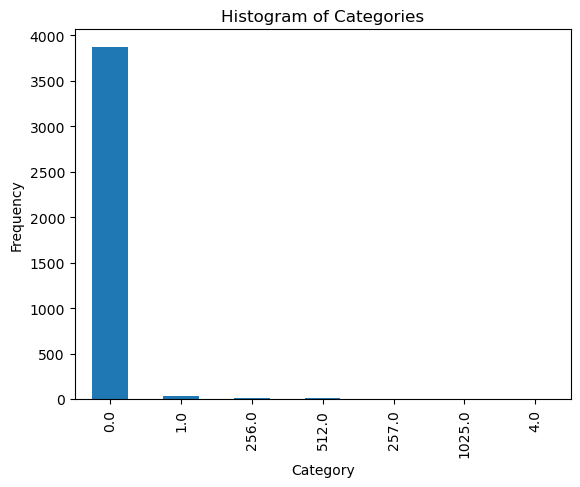

In [21]:
dfc=df_fin1

category_counts = dfc['Buttons'].value_counts()

# Plot histogram
category_counts.plot(kind='bar')
plt.title('Histogram of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()


#### Aux2

In [224]:
dffinal

In [225]:
dff['v_matrix'].to_list()[0][0]

(0.9977434873580933,
 -0.026007341220974922,
 -0.06189914420247078,
 0.0,
 0.024172378703951836,
 0.9992511868476868,
 -0.03021096996963024,
 0.0,
 -0.06263849884271622,
 -0.028646549209952354,
 -0.9976250529289246,
 0.0,
 -6.250676155090332,
 -1.1771824359893799,
 9.931766510009766,
 1.0)

In [218]:
df_cleaned['v_matrix']

0       [(0.9887017607688904, -0.004112054593861103, -...
1       [(0.9850170612335205, -0.0050815800204873085, ...
2       [(0.979637086391449, -0.012474964372813702, -0...
3       [(0.977176308631897, -0.004165051504969597, -0...
4       [(0.9809075593948364, -0.0010119006037712097, ...
                              ...                        
5017    [(-0.0007832050323486328, 0.18496498465538025,...
5018    [(-0.0007832050323486328, 0.18496498465538025,...
5019    [(-0.0007832050323486328, 0.18496498465538025,...
5020    [(-0.0007832050323486328, 0.18496498465538025,...
5021    [(-0.0007832050323486328, 0.18496498465538025,...
Name: v_matrix, Length: 5022, dtype: object

In [223]:
df_cleaned['v_matrix'] = df_cleaned['v_matrix'].apply(ast.literal_eval)
df_cleaned['camera_name'] = df_cleaned['camera_name'].apply(ast.literal_eval)

/home/chitra/anaconda3/envs/vr_ms/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/chitra/anaconda3/envs/vr_ms/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [163]:
df_cleaned['v_matrix']

0       [(0.9977434873580933, -0.026007341220974922, -...
1       [(0.9991512894630432, -0.020701130852103233, -...
2       [(0.9994901418685913, -0.031293340027332306, 0...
3       [(0.9973899126052856, -0.03788955509662628, 0....
4       [(0.996390163898468, -0.039766378700733185, 0....
                              ...                        
3828    [(-0.9985166788101196, 0.04926196485757828, 0....
3829    [(-0.9980481863021851, 0.03922105208039284, -0...
3830    [(-0.990553617477417, 0.009418772533535957, -0...
3831    [(-0.9852433204650879, 0.028429662808775902, -...
3832    [(-0.8319600820541382, 0.00526093877851963, -0...
Name: v_matrix, Length: 3833, dtype: object

In [164]:
df_cleaned['camera_name']

0       [CenterEyeAnchor]
1       [CenterEyeAnchor]
2       [CenterEyeAnchor]
3       [CenterEyeAnchor]
4       [CenterEyeAnchor]
              ...        
3828    [CenterEyeAnchor]
3829    [CenterEyeAnchor]
3830    [CenterEyeAnchor]
3831    [CenterEyeAnchor]
3832    [CenterEyeAnchor]
Name: camera_name, Length: 3833, dtype: object

In [165]:
df_cleaned.columns

Index(['frame', 'timestamp', 'head_dir', 'head_pos', 'head_vel', 'head_angvel',
       'left_eye_dir', 'left_eye_pos', 'left_eye_vel', 'left_eye_angvel',
       'right_eye_dir', 'right_eye_pos', 'right_eye_vel', 'right_eye_angvel',
       'left_eye', 'right_eye', 'confidence', 'is_valid',
       'ConnectedControllerTypes', 'Buttons', 'Touches', 'NearTouches',
       'IndexTrigger', 'HandTrigger', 'Thumbstick', 'object_name', 'bounds',
       'm_matrix', 'camera_name', 'p_matrix', 'v_matrix', 'video',
       'MS_rating'],
      dtype='object')

In [143]:
# df2['camera_name'].dropna()

#### aux3

In [23]:
# df_cleaned

In [17]:
df_final

,Buttons,Touches,NearTouches,IndTrig_L,IndTrig_R,HandTrig_L,HandTrig_R,Thumb_L,Thumb_R,LEye_Rot_Change,LEye_Position_Change,REye_Rot_Change,REye_Position_Change,Head_Position_Change,Head_Rot_Change,Head_Velocity_Change,Head_AngVel_Change,Camera_rot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.141700
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,3.141593,0.000000,3.141593,0.000000,0.002634,0.034558,0.013271,0.109352,3.141594
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,3.141593,0.000000,3.141593,0.000000,0.001488,0.017272,0.012815,0.145499,3.141606
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,3.141593,0.000000,3.141593,0.000000,0.001271,0.008808,0.008230,0.123398,3.141672
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,3.141593,0.000000,3.141593,0.000000,0.002145,0.031101,0.008376,0.123431,3.142748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,0.0,4112.0,0.0,0.0,0.0,0.0,0.0,0.99995,0.0,0.034704,0.002600,0.034333,0.002753,0.002851,0.014493,0.008890,0.182750,3.141594
3522,0.0,4112.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.027385,0.003142,0.027367,0.002603,0.002247,0.023297,0.009936,0.081733,3.141667
3523,0.0,4112.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.085260,0.002110,0.085042,0.002185,0.001891,0.032606,0.006041,0.043060,3.141747
3524,0.0,4112.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.247112,0.004666,0.247602,0.005760,0.005487,0.076152,0.011527,0.096597,3.141635


In [273]:
# df_cleaned['v_matrix'][0:4].to_list()

In [30]:
print("nan_count = ", df_cleaned['v_matrix'].isna().sum())

nan_count =  0


In [56]:
df_cleaned['v_matrix'][0:1].to_list()

['[(0.9815288782119751, -0.02133503369987011, 0.19012081623077393, 0.0, -0.0007814504206180573, 0.9933069944381714, 0.11550156772136688, 0.0, 0.19131255149841309, 0.11351668834686279, -0.9749428033828735, 0.0, 0.1249065175652504, -1.7224751710891724, -0.17157462239265442, 1.0), (-0.49923503398895264, 0.0, 0.8664668798446655, 0.0, 0.0, 1.0, 0.0, 0.0, 0.8664668798446655, 0.0, 0.49923503398895264, 0.0, -0.006863117218017578, -1.5244972705841064, -1.7876416444778442, 1.0)]']

In [58]:
df_cleaned['v_matrix'][0:4]

0    [(0.9815288782119751, -0.02133503369987011, 0....
1    [(0.979970395565033, -0.009629243053495884, 0....
2    [(0.9789361357688904, -0.003194621065631509, 0...
3    [(0.9779465198516846, 0.002379302866756916, 0....
Name: v_matrix, dtype: object

In [22]:
# df2

In [124]:
df4=df_cleaned

In [125]:
df4['camera_name']

0       [CenterEyeAnchor, Camera]
1       [CenterEyeAnchor, Camera]
2       [CenterEyeAnchor, Camera]
3       [CenterEyeAnchor, Camera]
4       [CenterEyeAnchor, Camera]
                  ...            
3521            [CenterEyeAnchor]
3522            [CenterEyeAnchor]
3523            [CenterEyeAnchor]
3524            [CenterEyeAnchor]
3525            [CenterEyeAnchor]
Name: camera_name, Length: 3526, dtype: object

In [86]:
#scene: object
df_cleaned['object_name'][0:4].to_list()

["['RewardSpriteRendererContainer', 'UI-occlusion-overdraw-layer', 'Back', 'HUIReactVRPanel(Clone)', 'S0_L0_M0_V1_optimized_geom,0', 'S0_L1_M1_V0_optimized_geom,0', 'Cylinder', 'Ring', 'PhysicalCursorBehaviour-RIGHT', 'Cylinder', 'Ring', 'PhysicalCursorBehaviour-LEFT', 'UI-occlusion-overdraw-layer', 'Back', 'HUIReactVRPanel(Clone)', 'UI-occlusion-overdraw-layer', 'Back', 'subtitle', 'username', 'nametag_0', 'LandingPlatform', 'm_ts_platform_grass', 'Grass', 'm_ts_platform', 'PlatformBank', 'All_Flowers', 'WelcomeIslandPhysicalCitySkybox', 'm_ts_mirror_frame', 'Waterline', 'PS_WindWisp_01 (1)', 'BirdCluster', 'PS_WindWisp_01', 'BirdCluster']",
 "['RewardSpriteRendererContainer', 'UI-occlusion-overdraw-layer', 'Back', 'HUIReactVRPanel(Clone)', 'S0_L0_M0_V1_optimized_geom,0', 'S0_L1_M1_V0_optimized_geom,0', 'Cylinder', 'Ring', 'PhysicalCursorBehaviour-RIGHT', 'Cylinder', 'Ring', 'PhysicalCursorBehaviour-LEFT', 'UI-occlusion-overdraw-layer', 'Back', 'HUIReactVRPanel(Clone)', 'UI-occlusion-

In [ ]:
# df_cleaned['bounds'][0:4].to_list()

In [67]:
# Get the column names
# df_cleaned['object_name'] = df_cleaned['object_name'].apply(ast.literal_eval)
# df_cleaned['bounds'] = df_cleaned['bounds'].apply(ast.literal_eval)
# df_cleaned['m_matrix'] = df_cleaned['m_matrix'].apply(ast.literal_eval)

In [ ]:
df_cleaned[['object_name','bounds', 'm_matrix']][0:4]

In [47]:
df=df_cleaned

def calculate_area(bounds):
    # Assuming bounds are (x_min, x_max, y_min, y_max, z_min, z_max)
    dx = bounds[1] - bounds[0]
    dy = bounds[3] - bounds[2]
    dz = bounds[5] - bounds[4]
    return dx * dy * dz

# Check whether the object named "" in each row of the object name column and remove it from there
df['object_name'] = df['object_name'].apply(lambda x: [item for item in x if item != ""])

# Assert that each row's number of objects is equal to the number of bounds and number of m matrices
# assert df.apply(lambda row: len(row['object_name']) == len(row['bounds']) == len(row['m_matrix']), axis=1).all()

# Calculate the area of each object using the bounds and delete the objects, bounds, and m matrices 
# from the relevant list if the area is less than 1
df['object_area'] = df['bounds'].apply(lambda bounds: [calculate_area(b) for b in bounds])
# df = df[df['object_area'].apply(lambda area_list: all(area >= 1 for area in area_list))]
# df.drop(columns=['object_area'], inplace=True)

# # Function to calculate the moving area using the m matrices
# def calculate_moving_area(m_matrix):
#     # Assuming m_matrix is a list of tuples
#     return sum(area for area, _ in m_matrix)

# # Calculate the moving area using the m matrices
# df['moving_area'] = df['m_matrix'].apply(calculate_moving_area)

/home/chitra/anaconda3/envs/vr_ms/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


IndexError: string index out of range

In [71]:
df['bounds'][0:1].to_list()[0]

['[(0.0, 1.714601755142212, 0.9533340334892273, 0.0, 0.0, 0.0), (0.0, 1.6699999570846558, 1.25, 0.0, 0.0, 0.0), (0.0, 1.6699999570846558, 1.25, 1.399999976158142, 0.7416648864746094, 0.11150436848402023), (0.0, 1.6699999570846558, 1.25, 1.399999976158142, 0.7416648864746094, 0.11150436848402023), (0.1198824867606163, 0.9947224259376526, 0.2662050426006317, 2.2468979358673096, 2.7117161750793457, 2.9597952365875244), (0.1201171800494194, 2.650224447250366, 0.26132482290267944, 2.1922082901000977, 2.636054277420044, 2.3194198608398438), (0.1201172024011612, 1.6804183721542358, 1.2465101480484009, 0.0032070367597043514, 0.003180932020768523, 0.0005402257083915174), (0.1201172024011612, 1.6804052591323853, 1.2465975284576416, 0.0047779083251953125, 0.004815393127501011, 0.0013128600548952818), (0.1201171949505806, 1.6804182529449463, 0.7597296833992004, 0.005000022239983082, 0.005000178702175617, 0.49178045988082886), (0.1201172024011612, 1.6804183721542358, 1.2465101480484009, 0.003207036

In [18]:
# df

In [15]:
bounds=df_cleaned['bounds'].to_list()

In [20]:
bounds[0:2]

['[(0.0, 1.714601755142212, 0.9533340334892273, 0.0, 0.0, 0.0), (0.0, 1.6699999570846558, 1.25, 0.0, 0.0, 0.0), (0.0, 1.6699999570846558, 1.25, 1.399999976158142, 0.7416648864746094, 0.11150436848402023), (0.0, 1.6699999570846558, 1.25, 1.399999976158142, 0.7416648864746094, 0.11150436848402023), (0.1198824867606163, 0.9947224259376526, 0.2662050426006317, 2.2468979358673096, 2.7117161750793457, 2.9597952365875244), (0.1201171800494194, 2.650224447250366, 0.26132482290267944, 2.1922082901000977, 2.636054277420044, 2.3194198608398438), (0.1201172024011612, 1.6804183721542358, 1.2465101480484009, 0.0032070367597043514, 0.003180932020768523, 0.0005402257083915174), (0.1201172024011612, 1.6804052591323853, 1.2465975284576416, 0.0047779083251953125, 0.004815393127501011, 0.0013128600548952818), (0.1201171949505806, 1.6804182529449463, 0.7597296833992004, 0.005000022239983082, 0.005000178702175617, 0.49178045988082886), (0.1201172024011612, 1.6804183721542358, 1.2465101480484009, 0.003207036

In [18]:
for i in bounds[0:2]:
    # print(i[1:-1])
    sel=i[1:-1]
    print(sel.split('),'))
    

['(0.0, 1.714601755142212, 0.9533340334892273, 0.0, 0.0, 0.0', ' (0.0, 1.6699999570846558, 1.25, 0.0, 0.0, 0.0', ' (0.0, 1.6699999570846558, 1.25, 1.399999976158142, 0.7416648864746094, 0.11150436848402023', ' (0.0, 1.6699999570846558, 1.25, 1.399999976158142, 0.7416648864746094, 0.11150436848402023', ' (0.1198824867606163, 0.9947224259376526, 0.2662050426006317, 2.2468979358673096, 2.7117161750793457, 2.9597952365875244', ' (0.1201171800494194, 2.650224447250366, 0.26132482290267944, 2.1922082901000977, 2.636054277420044, 2.3194198608398438', ' (0.1201172024011612, 1.6804183721542358, 1.2465101480484009, 0.0032070367597043514, 0.003180932020768523, 0.0005402257083915174', ' (0.1201172024011612, 1.6804052591323853, 1.2465975284576416, 0.0047779083251953125, 0.004815393127501011, 0.0013128600548952818', ' (0.1201171949505806, 1.6804182529449463, 0.7597296833992004, 0.005000022239983082, 0.005000178702175617, 0.49178045988082886', ' (0.1201172024011612, 1.6804183721542358, 1.246510148048

In [24]:
# df_cleaned['bounds'] = df_cleaned['bounds'].apply(ast.literal_eval)

In [54]:
def parse_data_string(data_string):
    # print(data_string)
    # Remove surrounding square brackets and split by ','
    data_string = data_string.strip('()').split(', ')
    # print(data_string)
    # Convert each element to a float and create a tuple
    data_tuple = tuple(map(float, data_string))
    return data_tuple

# List to store tuples
result = []

data_strings=df_cleaned['bounds'].to_list()
# Iterate over each string, convert it to tuple and append to result list
for data_string in data_strings:
    data_tuple_list = [parse_data_string(data) for data in data_string.strip('[]').split('), (')]
    result.extend(data_tuple_list)

# Printing the resulting list of tuples
# print(result)

In [28]:
data_string.strip('[]').split('), ')

'(0.0, 1.6699999570846558, 1.25, 0.0, 0.0, 0.0'

In [57]:
def parse_data_string(data_string):
    # print(data_string)
    # Remove surrounding square brackets and split by ','
    data_string = data_string.strip('()').split(', ')
    # print(data_string)
    # Convert each element to a float and create a tuple
    data_tuple = tuple(map(float, data_string))
    return data_tuple

def parse_data_string2(data_string):
    # print(data_string)
    # Remove surrounding square brackets and split by ','
    data_string = data_string.strip('()').split(', ')
    # print(data_string)
    return data_string


# List to store tuples
bounds = []
object_name=[]
m_matrix=[]

data_strings=df_cleaned['bounds'].to_list()
data_strings2=df_cleaned['m_matrix'].to_list()
data_strings3=df_cleaned['m_matrix'].to_list()
# Iterate over each string, convert it to tuple and append to result list
for data_string in data_strings:
    data_tuple_list = [parse_data_string(data) for data in data_string.strip('[]').split('), (')]
    bounds.extend(data_tuple_list)
    
for data_string in data_strings2:
    data_tuple_list = [parse_data_string(data) for data in data_string.strip('[]').split('), (')]
    object_name.extend(data_tuple_list)
    
for data_string in data_strings3:
    data_tuple_list = [parse_data_string(data) for data in data_string.strip('[]').split('), (')]
    m_matrix.extend(data_tuple_list)

In [ ]:
result = list(filter(lambda x: x != value_to_remove, objec))

In [15]:
### Gaze

In [30]:
df_cleaned

,frame,timestamp,head_dir,head_pos,head_vel,head_angvel,left_eye_dir,left_eye_pos,left_eye_vel,left_eye_angvel,...,p3,LEye_Rot_Change,LEye_Position_Change,REye_Rot_Change,REye_Position_Change,Head_Rot_Change,Head_Position_Change,Head_Velocity_Change,Head_AngVel_Change,Camera_rot
0,1750,1695618405889,"(-0.0576174221932888, 0.09596268832683563, 0.0...","(-0.21343141794204712, 0.03986649215221405, 0....","(-0.003757892409339547, 0.022930940613150597, ...","(0.28466057777404785, -0.00014114589430391788,...","(-0.0576174221932888, 0.09596268832683563, 0.0...","(-0.1800171285867691, 0.039839889854192734, 0....","(-0.003757892409339547, 0.022930940613150597, ...","(0.28466057777404785, -0.00014114589430391788,...",...,-0.104801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.141700
1,1760,1695618406026,"(-0.041450370103120804, 0.10007180273532867, 0...","(-0.21433621644973755, 0.04232766479253769, 0....","(-0.009238642640411854, 0.0161655955016613, -0...","(0.2002345621585846, 0.06549251079559326, -0.0...","(-0.041450370103120804, 0.10007180273532867, 0...","(-0.18097497522830963, 0.042090628296136856, 0...","(-0.009238642640411854, 0.0161655955016613, -0...","(0.2002345621585846, 0.06549251079559326, -0.0...",...,-0.081946,3.141593,0.000000,3.141593,0.000000,0.034558,0.002634,0.013271,0.109352,3.141594
2,1770,1695618406166,"(-0.033589962869882584, 0.10260840505361557, -...","(-0.21533513069152832, 0.04342716932296753, 0....","(-0.006411966402083635, 0.003910341300070286, ...","(0.07391433417797089, 0.01105477288365364, -0....","(-0.033589962869882584, 0.10260840505361557, -...","(-0.18200910091400146, 0.043066591024398804, 0...","(-0.006411966402083635, 0.003910341300070286, ...","(0.07391433417797089, 0.01105477288365364, -0....",...,-0.034514,3.141593,0.000000,3.141593,0.000000,0.017272,0.001488,0.012815,0.145499,3.141606
3,1780,1695618406304,"(-0.030887747183442116, 0.10491364449262619, -...","(-0.21643923223018646, 0.04351729527115822, 0....","(-0.013677635230123997, 0.0016962009249255061,...","(0.04485063999891281, 0.11485554277896881, -0....","(-0.030887747183442116, 0.10491364449262619, -...","(-0.1831468939781189, 0.04299502447247505, 0.2...","(-0.013677635230123997, 0.0016962009249255061,...","(0.04485063999891281, 0.11485554277896881, -0....",...,-0.094579,3.141593,0.000000,3.141593,0.000000,0.008808,0.001271,0.008230,0.123398,3.141672
4,1790,1695618406445,"(-0.031329672783613205, 0.11402732133865356, -...","(-0.2183721363544464, 0.04330553114414215, 0.2...","(-0.009170650504529476, -0.0047914511524140835...","(-0.06122029200196266, 0.07325053215026855, -0...","(-0.031329672783613205, 0.11402732133865356, -...","(-0.1852339655160904, 0.04191333428025246, 0.2...","(-0.009170650504529476, -0.0047914511524140835...","(-0.06122029200196266, 0.07325053215026855, -0...",...,-0.142047,3.141593,0.000000,3.141593,0.000000,0.031101,0.002145,0.008376,0.123431,3.142748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,36960,1695618962245,"(0.007442781701683998, -0.8472747206687927, 0....","(-0.9935444593429565, 0.04446560516953468, 0.0...","(-0.016495907679200172, -0.0024455010425299406...","(-0.022951969876885414, -0.0886290967464447, 0...","(0.0074427807703614235, -0.8472746014595032, 0...","(-1.0085421800613403, 0.04227152094244957, 0.0...","(-0.016495907679200172, -0.0024455010425299406...","(-0.022951969876885414, -0.0886290967464447, 0...",...,0.091115,0.034704,0.002600,0.034333,0.002753,0.014493,0.002851,0.008890,0.182750,3.141594
3522,36970,1695618962391,"(0.009398633614182472, -0.8417103886604309, 0....","(-0.9946966171264648, 0.043783314526081085, 0....","(-0.00801934115588665, -0.0016302947187796235,...","(0.018260939046740532, -0.13847309350967407, 0...","(0.009398633614182472, -0.8417103886604309, 0....","(-1.0090278387069702, 0.04160238057374954, 0.0...","(-0.00801934115588665, -0.0016302947187796235,...","(0.018260939046740532, -0.13847309350967407, 0...",...,0.041142,0.027385,0.003142,0.027

In [31]:
df_cleaned['head_pos'][3400:3500].to_list()

['(-0.8094092011451721, 0.026380270719528198, -0.032494060695171356)',
 '(-0.8104071617126465, 0.024447422474622726, -0.029846949502825737)',
 '(-0.8118422031402588, 0.023097582161426544, -0.02836097590625286)',
 '(-0.8157687187194824, 0.023140089586377144, -0.025347772985696793)',
 '(-0.8222699761390686, 0.02095566689968109, -0.018350593745708466)',
 '(-0.835497260093689, 0.011621735990047455, -0.0011316221207380295)',
 '(-0.8470621109008789, -0.004339616280049086, 0.012620383873581886)',
 '(-0.858823299407959, -0.015021584928035736, 0.023211423307657242)',
 '(-0.8674519062042236, -0.020647190511226654, 0.027867181226611137)',
 '(-0.8710129261016846, -0.020899906754493713, 0.026134436950087547)',
 '(-0.8702746629714966, -0.018561281263828278, 0.02159726619720459)',
 '(-0.8651332855224609, -0.013027743436396122, 0.01405271701514721)',
 '(-0.8542904853820801, 0.0033224481157958508, 0.004848579876124859)',
 '(-0.8403872847557068, 0.020172566175460815, -0.001737966202199459)',
 '(-0.83277

In [20]:
df_cleaned.columns

Index(['frame', 'timestamp', 'head_dir', 'head_pos', 'head_vel', 'head_angvel',
       'left_eye_dir', 'left_eye_pos', 'left_eye_vel', 'left_eye_angvel',
       'right_eye_dir', 'right_eye_pos', 'right_eye_vel', 'right_eye_angvel',
       'left_eye', 'right_eye', 'confidence', 'is_valid',
       'ConnectedControllerTypes', 'Buttons', 'Touches', 'NearTouches',
       'IndexTrigger', 'HandTrigger', 'Thumbstick', 'object_name', 'bounds',
       'm_matrix', 'camera_name', 'p_matrix', 'v_matrix', 'video', 'MS_rating',
       'IndTrig_L', 'IndTrig_R', 'HandTrig_L', 'HandTrig_R', 'PrevX_L',
       'PrevY_L', 'PrevX_R', 'PrevY_R', 'Thumb_L', 'Thumb_R', 'x', 'y', 'z',
       'w', 'p1', 'p2', 'p3', 'LEye_Rot_Change', 'LEye_Position_Change',
       'REye_Rot_Change', 'REye_Position_Change', 'Head_Rot_Change',
       'Head_Position_Change', 'Head_Velocity_Change', 'Head_AngVel_Change',
       'Camera_rot'],
      dtype='object')

In [18]:
df_cleaned['object_name'][500:505].to_list()

["['RewardSpriteRendererContainer', 'UI-occlusion-overdraw-layer', 'Back', 'HUIReactVRPanel(Clone)', 'S0_L0_M0_V1_optimized_geom,0', 'S0_L1_M1_V0_optimized_geom,0', 'UI-occlusion-overdraw-layer', 'Back', 'HUIReactVRPanel(Clone)', 'UI-occlusion-overdraw-layer', 'Cylinder', 'Ring', 'PhysicalCursorBehaviour-RIGHT', 'Cylinder', 'Ring', 'PhysicalCursorBehaviour-LEFT', 'RingReticle', 'UI-occlusion-overdraw-layer', 'Back', 'HUIReactVRPanel(Clone)', 'UI-occlusion-overdraw-layer', 'Back', 'subtitle', 'username', 'nametag_0', 'LandingPlatform', 'm_ts_platform_grass', 'Grass', 'm_ts_platform', 'PlatformBank', 'All_Flowers', 'WelcomeIslandPhysicalCitySkybox', 'm_ts_mirror_frame', 'Waterline', 'PS_WindWisp_01 (1)', 'BirdCluster', 'PS_WindWisp_01', 'BirdCluster']",
 "['RewardSpriteRendererContainer', 'UI-occlusion-overdraw-layer', 'Back', 'HUIReactVRPanel(Clone)', 'S0_L0_M0_V1_optimized_geom,0', 'S0_L1_M1_V0_optimized_geom,0', 'UI-occlusion-overdraw-layer', 'Back', 'HUIReactVRPanel(Clone)', 'UI-occl

In [19]:
'RewardSpriteRendererContainer', 'UI-occlusion-overdraw-layer', 'Back', 'HUIReactVRPanel(Clone)', 'S0_L0_M0_V1_optimized_geom,0', 'S0_L1_M1_V0_optimized_geom,0', 'UI-occlusion-overdraw-layer', 'Back', 'HUIReactVRPanel(Clone)', 'UI-occlusion-overdraw-layer', 'Cylinder', 'Ring', 'PhysicalCursorBehaviour-RIGHT', 'Cylinder', 'Ring', 'PhysicalCursorBehaviour-LEFT', 'RingReticle', 'UI-occlusion-overdraw-layer', 'Back', 'HUIReactVRPanel(Clone)', 'UI-occlusion-overdraw-layer', 'Back', 'subtitle', 'username', 'nametag_0', 'LandingPlatform', 'm_ts_platform_grass', 'Grass', 'm_ts_platform', 'PlatformBank', 'All_Flowers', 'WelcomeIslandPhysicalCitySkybox', 'm_ts_mirror_frame', 'Waterline', 'PS_WindWisp_01 (1)', 'BirdCluster', 'PS_WindWisp_01', 'BirdCluster'

('RewardSpriteRendererContainer',
 'UI-occlusion-overdraw-layer',
 'Back',
 'HUIReactVRPanel(Clone)',
 'S0_L0_M0_V1_optimized_geom,0',
 'S0_L1_M1_V0_optimized_geom,0',
 'UI-occlusion-overdraw-layer',
 'Back',
 'HUIReactVRPanel(Clone)',
 'UI-occlusion-overdraw-layer',
 'Cylinder',
 'Ring',
 'PhysicalCursorBehaviour-RIGHT',
 'Cylinder',
 'Ring',
 'PhysicalCursorBehaviour-LEFT',
 'RingReticle',
 'UI-occlusion-overdraw-layer',
 'Back',
 'HUIReactVRPanel(Clone)',
 'UI-occlusion-overdraw-layer',
 'Back',
 'subtitle',
 'username',
 'nametag_0',
 'LandingPlatform',
 'm_ts_platform_grass',
 'Grass',
 'm_ts_platform',
 'PlatformBank',
 'All_Flowers',
 'WelcomeIslandPhysicalCitySkybox',
 'm_ts_mirror_frame',
 'Waterline',
 'PS_WindWisp_01 (1)',
 'BirdCluster',
 'PS_WindWisp_01',
 'BirdCluster')

In [22]:
df.columns

Index(['frame', 'timestamp', 'head_dir', 'head_pos', 'head_vel', 'head_angvel',
       'left_eye_dir', 'left_eye_pos', 'left_eye_vel', 'left_eye_angvel',
       'right_eye_dir', 'right_eye_pos', 'right_eye_vel', 'right_eye_angvel',
       'left_eye', 'right_eye', 'confidence', 'is_valid',
       'ConnectedControllerTypes', 'Buttons', 'Touches', 'NearTouches',
       'IndexTrigger', 'HandTrigger', 'Thumbstick', 'object_name', 'bounds',
       'm_matrix', 'camera_name', 'p_matrix', 'v_matrix', 'video',
       'MS_rating'],
      dtype='object')

In [33]:
df_cleaned[["head_pos","video"]][3030:3031]

,head_pos,video
3030,"(-0.09592477977275848, 0.014242427423596382, -...",video/34170


In [24]:
df_cleaned["bounds"][2000:2100].to_list()

['(0.1420237421989441, 0.05791599303483963, 0.24439409375190735)',
 '(0.14394566416740417, 0.05771343410015106, 0.24405957758426666)',
 '(0.1462831199169159, 0.05800729617476463, 0.2438935488462448)',
 '(0.14922387897968292, 0.05825590714812279, 0.24419888854026794)',
 '(0.1532624065876007, 0.058546893298625946, 0.2440323531627655)',
 '(0.15536023676395416, 0.05803234502673149, 0.24336057901382446)',
 '(0.15669120848178864, 0.057607974857091904, 0.24305924773216248)',
 '(0.15841645002365112, 0.05676376447081566, 0.2432946264743805)',
 '(0.15772761404514313, 0.05640145391225815, 0.2434561550617218)',
 '(0.15705540776252747, 0.05644525960087776, 0.24383649230003357)',
 '(0.15647932887077332, 0.056501355022192, 0.24470484256744385)',
 '(0.15614435076713562, 0.05679905414581299, 0.24565047025680542)',
 '(0.15620967745780945, 0.05690634250640869, 0.24662691354751587)',
 '(0.15648595988750458, 0.05671048164367676, 0.24716761708259583)',
 '(0.15706263482570648, 0.056790295988321304, 0.2480933

In [25]:
df.columns

Index(['frame', 'timestamp', 'head_dir', 'head_pos', 'head_vel', 'head_angvel',
       'left_eye_dir', 'left_eye_pos', 'left_eye_vel', 'left_eye_angvel',
       'right_eye_dir', 'right_eye_pos', 'right_eye_vel', 'right_eye_angvel',
       'left_eye', 'right_eye', 'confidence', 'is_valid',
       'ConnectedControllerTypes', 'Buttons', 'Touches', 'NearTouches',
       'IndexTrigger', 'HandTrigger', 'Thumbstick', 'object_name', 'bounds',
       'm_matrix', 'camera_name', 'p_matrix', 'v_matrix', 'video',
       'MS_rating'],
      dtype='object')

In [40]:
list1=df_cleaned["bounds"][2000:2100].to_list()[0][1:-1].split('), (')

def changettoint(list1):
    list2=[]
    for i in range(len(list1)):
        item=list1[i]
        if i ==0:
            item=item[1:]
        if i==len(list1)-1:
            item=item[:-1]
        # item=
        # print(item)
        item=list(map(float, item.split(", ")))
        list2.append(list1)
    return(list2)

    

In [41]:
list1

['(-4999.8642578125, -4999.93798828125, -4999.392578125, 0.0, 0.0, 0.0',
 '-4999.8642578125, -4999.93798828125, -4999.392578125, 0.0, 0.0, 0.0',
 '-4999.8642578125, -4999.93798828125, -4999.392578125, 0.0, 0.0, 0.0',
 '-5000.0, -5000.0, -5000.0, 499.9997253417969, 499.9998779296875, 499.9997253417969',
 '-4999.8486328125, -3403.057861328125, -4990.646484375, 2.8842899799346924, 0.4290136396884918, 0.0',
 '-4999.87841796875, -3401.84423828125, -4990.646484375, 8.403562545776367, 0.6342071294784546, 0.0',
 '-4999.85009765625, -3400.408203125, -4990.646484375, 2.897257089614868, 0.45356813073158264, 0.0',
 '-0.005066394805908203, 0.0, -0.005066394805908203, 9999.9951171875, 10000.0, 9999.9951171875)']

In [42]:
list1

['(-4999.8642578125, -4999.93798828125, -4999.392578125, 0.0, 0.0, 0.0',
 '-4999.8642578125, -4999.93798828125, -4999.392578125, 0.0, 0.0, 0.0',
 '-4999.8642578125, -4999.93798828125, -4999.392578125, 0.0, 0.0, 0.0',
 '-5000.0, -5000.0, -5000.0, 499.9997253417969, 499.9998779296875, 499.9997253417969',
 '-4999.8486328125, -3403.057861328125, -4990.646484375, 2.8842899799346924, 0.4290136396884918, 0.0',
 '-4999.87841796875, -3401.84423828125, -4990.646484375, 8.403562545776367, 0.6342071294784546, 0.0',
 '-4999.85009765625, -3400.408203125, -4990.646484375, 2.897257089614868, 0.45356813073158264, 0.0',
 '-0.005066394805908203, 0.0, -0.005066394805908203, 9999.9951171875, 10000.0, 9999.9951171875)']

In [84]:
x1=3201

list1=df_cleaned["bounds"][x1:x1+1].to_list()[0][1:-1].split('), (')
listobj=df_cleaned["object_name"][x1:x1+1].to_list()[0][1:-1].split(', ')
list3=df_cleaned["bounds"][x1+1:x1+2].to_list()[0][1:-1].split('), (')
listobj3=df_cleaned["object_name"][x1+1:x1+2].to_list()[0][1:-1].split(', ')


In [85]:
# listobj
print(len(list1),len(listobj))

101 101


In [86]:
indexes = [index for index, item in enumerate(listobj) if item.startswith("'MeshCluster_")]

In [87]:
count=0
for i in indexes:
    obj=listobj[i]
    if obj in listobj3:
        ind=listobj3.index(obj)
        # print("-------------", obj)
        # print(list1[i])
        # print(list3[ind])
        if list1[i]!=list3[ind]:
            print("*************not similar")
            print("-------------", obj)
            print(list1[i])
            print(list3[ind])
            count+=1

*************not similar
------------- 'MeshCluster_104'
0.05866193771362305, 0.8921390175819397, 13.001099586486816, 4.531610012054443, 0.8353021740913391, 9.707977294921875
-0.0054988861083984375, 0.8921390175819397, 13.001099586486816, 4.595770835876465, 0.8353021740913391, 9.707977294921875


In [83]:
df_cleaned[["object_name","video"]][3201:3203]

,object_name,video
3201,"['UI-occlusion-overdraw-layer', 'Back', 'HUIRe...",video/35880
3202,"['UI-occlusion-overdraw-layer', 'Back', 'HUIRe...",video/35890
